In [1]:
from fitter import Fitter, get_common_distributions, get_distributions
import os
import logging
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.neighbors import LocalOutlierFactor
import statsmodels
import statsmodels.api as sm
import seaborn as sns

In [2]:
def append_percentage(x, pos):
    del pos
    return str(int(x))+str('%')

def formatter(x, pos):
    del pos
    return str(int(x*100))+str('%')

In [3]:
# sns.set(
#     context="paper",
#     style="darkgrid",
#     palette="pastel",
#     rc={"figure.dpi": 150}
# )
sns.set_context("paper", font_scale=1.5)

In [4]:
def use_fitter(data):
    # Initialize the fitter object
    # f = Fitter(data, distributions='common')
    f = Fitter(data)

    # Fit common distributions
    f.fit(get_common_distributions())

    # Print the summary of the fitted distributions
    print(f.summary())

    print (f.get_best(method = 'sumsquare_error'))
    print (f.get_best(method = 'aic'))
    print (f.get_best(method = 'bic'))
    # print (f.get_best(method = 'kl_div'))
    print (f.get_best(method = 'ks_statistic'))
    print (f.get_best(method = 'ks_pvalue'))

In [5]:
def remove_outlier(data, contamination=0.1):
    lof = LocalOutlierFactor(n_neighbors=20, contamination=contamination)
    yhat = lof.fit_predict(data)
    mask = yhat != -1
    return data[mask]

# MTTU vs MTTR

## Load MTTU

In [6]:
data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "data"), "mttu"), "mttu_weighted.csv")
print (data_file)
df_tood = pd.read_csv(data_file,
                header=0,
                sep=',',
                on_bad_lines='skip',
                usecols=['system_name', 'from_package_name', 'mttu_expo_weighted', 'mttu_inverse_weighted'],
                )
# df.columns = ['system_name', 'package_name', 'mttu_expo_weighted', 'mttu_inverse_weighted']
rows = df_tood.shape[0]
print (df_tood.shape)
display(df_tood.head())

/home/imranur/security-metrics/code/visualize-data/../../data/mttu/mttu_weighted.csv
(123318, 4)


,system_name,from_package_name,mttu_expo_weighted,mttu_inverse_weighted
0,CARGO,aarch64,163.447836,173.998678
1,CARGO,ab-av1,26.166300,28.896919
2,CARGO,ab_glyph,3.542718,2.210279
3,CARGO,abi_stable,120.292295,119.042406
4,CARGO,actix-casbin,0.049948,0.049965


In [7]:
df_tood = df_tood.dropna()

In [26]:
# df_tood = df_tood[df_tood['mttu_inverse_weighted'].round(2) > 0.00] # No need to do this for MTTU

In [8]:
display(df_tood[['system_name', 'mttu_inverse_weighted']].groupby(by=['system_name']).describe())

mttu_inverse_weighted                                        \
                            count       mean        std  min        25%   
system_name                                                               
CARGO                      2314.0  35.112547  69.417579  0.0   1.028669   
NPM                       98962.0  53.073430  80.095840  0.0   5.008718   
PYPI                      22042.0  59.991284  82.791315  0.0  10.768100   

                                                
                   50%        75%          max  
system_name                                     
CARGO        14.760317  39.839826  1285.942425  
NPM          22.018655  69.103296  2653.000000  
PYPI         27.936342  70.839642  1260.990032

In [9]:
print(df_tood.groupby(by=['system_name'])['mttu_inverse_weighted'].describe().to_latex(columns=['count', 'mean', 'std', 'min', 'max'], float_format="%.0f", bold_rows=False, label="tab:statistics", caption="Statistics of the MTTU per system."))

\begin{table}
\caption{Statistics of the MTTU per system.}
\label{tab:statistics}
\begin{tabular}{lrrrrr}
\toprule
 & count & mean & std & min & max \\
system_name &  &  &  &  &  \\
\midrule
CARGO & 2314 & 35 & 69 & 0 & 1286 \\
NPM & 98962 & 53 & 80 & 0 & 2653 \\
PYPI & 22042 & 60 & 83 & 0 & 1261 \\
\bottomrule
\end{tabular}
\end{table}



In [10]:
print(df_tood.groupby(by=['system_name'])['mttu_inverse_weighted'].describe().to_latex(columns=['count', 'mean', 'std', 'min', 'max'], float_format="%.4f", bold_rows=False, label="tab:statistics", caption="Statistics of the MTTU per system."))

\begin{table}
\caption{Statistics of the MTTU per system.}
\label{tab:statistics}
\begin{tabular}{lrrrrr}
\toprule
 & count & mean & std & min & max \\
system_name &  &  &  &  &  \\
\midrule
CARGO & 2314.0000 & 35.1125 & 69.4176 & 0.0000 & 1285.9424 \\
NPM & 98962.0000 & 53.0734 & 80.0958 & 0.0000 & 2653.0000 \\
PYPI & 22042.0000 & 59.9913 & 82.7913 & 0.0000 & 1260.9900 \\
\bottomrule
\end{tabular}
\end{table}



## Load MTTR

In [11]:
data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "data"), "mttr"), "mttr_weighted.csv")
print (data_file)
df_pfet = pd.read_csv(data_file,
                header=0,
                sep=',',
                on_bad_lines='skip',
                usecols=['system_name', 'from_package_name', 'mttr_expo_weighted', 'mttr_inverse_weighted'],
                )
# df.columns = ['system_name', 'package_name', 'total_requirement_duration', 'post_fix_exposure_time', 'ratio', 'dependents_approx']
rows = df_pfet.shape[0]
print (df_pfet.shape)
display(df_pfet.head())

/home/imranur/security-metrics/code/visualize-data/../../data/mttr/mttr_weighted.csv
(23132, 4)


,system_name,from_package_name,mttr_expo_weighted,mttr_inverse_weighted
0,CARGO,ahrs,36.0526993005824672,36.02860654395707559855
1,CARGO,alloc_geiger,54.7168492822226318,58.68176648241368966030
2,CARGO,almel,2.9962037381311793,2.99309165644807516156
3,CARGO,amp,56.8227934271684876,64.47427516844615452704
4,CARGO,broot,11.8998697836120124,12.28989379959406443391


In [12]:
df_pfet = df_pfet.dropna()

In [13]:
df_pfet['mttr_inverse_weighted'] = pd.to_numeric(df_pfet['mttr_inverse_weighted'], errors='coerce')
df_pfet = df_pfet[df_pfet['mttr_inverse_weighted'].round(2) > 0.00]

In [31]:
df_pfet['mttr_expo_weighted'] = pd.to_numeric(df_pfet['mttr_expo_weighted'], errors='coerce')
df_pfet = df_pfet[df_pfet['mttr_expo_weighted'].round(2) > 0.00]

In [32]:
display(df_pfet[['system_name', 'mttr_inverse_weighted']].groupby(by=['system_name']).describe())

mttr_inverse_weighted                                             \
                            count       mean        std       min        25%   
system_name                                                                    
CARGO                        92.0  42.526663  68.595921  1.000000   9.986377   
NPM                       17262.0  50.178964  80.881100  0.013369   6.049650   
PYPI                       5158.0  39.173828  41.383570  0.007820  13.030719   

                                               
                   50%        75%         max  
system_name                                    
CARGO        26.726658  41.997838  516.000000  
NPM          17.512115  50.989062  878.994011  
PYPI         27.355062  51.128509  671.990551

In [33]:
display(df_pfet[['system_name', 'mttr_expo_weighted']].groupby(by=['system_name']).describe())

mttr_expo_weighted                                             \
                         count       mean        std       min        25%   
system_name                                                                 
CARGO                     92.0  40.031026  63.341538  1.000000  10.043858   
NPM                    17262.0  40.579487  54.750374  0.013490  11.518368   
PYPI                    5158.0  35.814610  36.391565  0.115882  14.000000   

                                          
                   50%        75%    max  
system_name                               
CARGO        26.521348  42.660569  516.0  
NPM          23.274231  43.347644  876.0  
PYPI         25.421665  46.490666  493.0

In [15]:
print(df_pfet.groupby(by=['system_name'])['mttr_inverse_weighted'].describe().to_latex(columns=['count', 'mean', 'std', 'min', 'max'], float_format="%.0f", bold_rows=False, label="tab:statistics", caption="Statistics of the MTTR per system."))

\begin{table}
\caption{Statistics of the MTTR per system.}
\label{tab:statistics}
\begin{tabular}{lrrrrr}
\toprule
 & count & mean & std & min & max \\
system_name &  &  &  &  &  \\
\midrule
CARGO & 92 & 43 & 69 & 1 & 516 \\
NPM & 17262 & 50 & 81 & 0 & 879 \\
PYPI & 5158 & 39 & 41 & 0 & 672 \\
\bottomrule
\end{tabular}
\end{table}



# Keep packages having both MTTU & MTTR

In [34]:
s2 = pd.merge(df_tood, df_pfet, how='inner', on=['system_name', 'from_package_name'], suffixes=('_mttu', '_mttr'))  

In [35]:
s2.columns

Index(['system_name', 'from_package_name', 'mttu_expo_weighted',
       'mttu_inverse_weighted', 'mttr_expo_weighted', 'mttr_inverse_weighted'],
      dtype='object')

In [36]:
s2.shape[0]

22512

In [18]:
#s2.drop(s2[s2.avg_out_of_date_duration > s2.avg_post_fix_exposure_time].index, inplace=True)

In [19]:
s1 = pd.merge(df_tood, df_pfet, how='left', on=['system_name', 'from_package_name'], suffixes=('_mttu', '_mttr'))

In [20]:
s1.columns

Index(['system_name', 'from_package_name', 'mttu_expo_weighted',
       'mttu_inverse_weighted', 'mttr_expo_weighted', 'mttr_inverse_weighted'],
      dtype='object')

In [21]:
s1

,system_name,from_package_name,mttu_expo_weighted,mttu_inverse_weighted,mttr_expo_weighted,mttr_inverse_weighted
0,CARGO,aarch64,163.447836,173.998678,NaN,NaN
1,CARGO,ab-av1,26.166300,28.896919,NaN,NaN
2,CARGO,ab_glyph,3.542718,2.210279,NaN,NaN
3,CARGO,abi_stable,120.292295,119.042406,NaN,NaN
4,CARGO,actix-casbin,0.049948,0.049965,NaN,NaN
...,...,...,...,...,...,...
123313,PYPI,zvt,21.304002,14.588880,19.3377718858590721,7.02601
123314,PYPI,zxkane-cdk-construct-simple-nat,1.084557,1.080852,NaN,NaN
123315,PYPI,zygoat,22.863080,56.622943,NaN,NaN
123316,PYPI,zygoat-django,28.358231,27.009683,NaN,NaN


In [22]:
s1.loc[s1.avg_out_of_date_duration == 0.0, 'avg_post_fix_exposure_time'] = 0.0
s1.loc[s1.avg_ratio_mttu == 0.0, 'avg_ratio_mttr'] = 0.0

In [23]:
s1.dropna(inplace=True)
s1

,system_name,from_package_name,avg_out_of_date_duration,avg_ratio_mttu,avg_post_fix_exposure_time,avg_ratio_mttr
0,CARGO,a10,0.0,0.0,0.0,0.0
2,CARGO,aardvark-dns,0.0,0.0,0.0,0.0
6,CARGO,abstract_integers,0.0,0.0,0.0,0.0
7,CARGO,activitypub_federation,0.0,0.0,0.0,0.0
8,CARGO,actix,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
163198,PYPI,zxing-cpp,0.0,0.0,0.0,0.0
163200,PYPI,zyf,0.0,0.0,0.0,0.0
163203,PYPI,zyte-api,0.0,0.0,0.0,0.0
163204,PYPI,zython,0.0,0.0,0.0,0.0


In [24]:
# Not doing actually
# s1.drop(s1[s1.avg_out_of_date_duration > s1.avg_post_fix_exposure_time].index)
s1[s1.avg_out_of_date_duration < s1.avg_post_fix_exposure_time]

,system_name,from_package_name,avg_out_of_date_duration,avg_ratio_mttu,avg_post_fix_exposure_time,avg_ratio_mttr
89,CARGO,alloc_geiger,811.000000,0.893664,1516.0,0.988266
1080,CARGO,em-app,749.500000,0.687615,1128.0,0.752502
1172,CARGO,fdt-rs,565.000000,0.371283,1238.0,0.805990
1318,CARGO,gfold,22.000000,0.136476,26.0,0.046181
1380,CARGO,gpgme,32.000000,0.077922,96.0,0.603774
...,...,...,...,...,...,...
162953,PYPI,zero-play,138.000000,0.157406,966.0,0.674581
162972,PYPI,zfit,89.482759,0.083548,137.0,0.130352
163004,PYPI,zimscraperlib,214.250000,0.267061,255.0,0.169042
163018,PYPI,zlmdb,78.500000,0.040726,628.0,0.322051


In [42]:
packages = pd.merge(s1, s2, how='inner', on=['system_name', 'from_package_name'])
packages

,system_name,from_package_name,mttu_expo_weighted_x,mttu_inverse_weighted_x,mttr_expo_weighted_x,mttr_inverse_weighted_x,mttu_expo_weighted_y,mttu_inverse_weighted_y,mttr_expo_weighted_y,mttr_inverse_weighted_y
0,CARGO,ahrs,77.520011,43.951056,36.0526993005824672,36.028607,77.520011,43.951056,36.0526993005824672,36.028607
1,CARGO,alloc_geiger,44.845848,54.378846,54.7168492822226318,58.681766,44.845848,54.378846,54.7168492822226318,58.681766
2,CARGO,almel,44.602489,66.997104,2.9962037381311793,2.993092,44.602489,66.997104,2.9962037381311793,2.993092
3,CARGO,amp,44.315122,66.990913,56.8227934271684876,64.474275,44.315122,66.990913,56.8227934271684876,64.474275
4,CARGO,broot,11.015278,12.119585,11.8998697836120124,12.289894,11.015278,12.119585,11.8998697836120124,12.289894
...,...,...,...,...,...,...,...,...,...,...
22507,PYPI,zqpy,94.514652,148.912692,49.4952613669772905,70.981434,94.514652,148.912692,49.4952613669772905,70.981434
22508,PYPI,zsl,36.004910,29.790718,21.9816020582840050,21.120350,36.004910,29.790718,21.9816020582840050,21.120350
22509,PYPI,zucchini,37.143304,103.838352,30.3340315684709993,86.794570,37.143304,103.838352,30.3340315684709993,86.794570
22510,PYPI,zuul,24.966709,26.104082,20.0000000000000000,20.000000,24.966709,26.104082,20.0000000000000000,20.000000


# Error Analysis

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error
import numpy as np

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(s2['mttu_inverse_weighted'], s2['mttr_inverse_weighted'])

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(s2['mttu_inverse_weighted'], s2['mttr_inverse_weighted'])

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Median Absolute Error (MedAE)
medae = median_absolute_error(s2['mttu_inverse_weighted'], s2['mttr_inverse_weighted'])

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Median Absolute Error (MedAE): {medae:.2f}")

Mean Absolute Error (MAE): 37.56
Mean Squared Error (MSE): 4268.91
Root Mean Squared Error (RMSE): 65.34
Median Absolute Error (MedAE): 16.03


In [23]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(s2['mttu_expo_weighted'], s2['mttr_expo_weighted'])

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(s2['mttu_expo_weighted'], s2['mttr_expo_weighted'])

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Median Absolute Error (MedAE)
medae = median_absolute_error(s2['mttu_expo_weighted'], s2['mttr_expo_weighted'])

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Median Absolute Error (MedAE): {medae:.2f}")

Mean Absolute Error (MAE): 22.71
Mean Squared Error (MSE): 1807.95
Root Mean Squared Error (RMSE): 42.52
Median Absolute Error (MedAE): 10.34


In [16]:
# Calculate ratio-based error metrics
s2['ratio_mttu_mttr'] = s2['avg_out_of_date_duration'] / s2['avg_post_fix_exposure_time']
s2['ratio_mttr_mttu'] = s2['avg_post_fix_exposure_time'] / s2['avg_out_of_date_duration']

# Calculate relative error (MTTU - MTTR) / MTTR
s2['relative_error'] = (s2['avg_out_of_date_duration'] - s2['avg_post_fix_exposure_time']) / s2['avg_post_fix_exposure_time']

# Calculate percentage difference
s2['percentage_diff'] = abs(s2['avg_out_of_date_duration'] - s2['avg_post_fix_exposure_time']) / ((s2['avg_out_of_date_duration'] + s2['avg_post_fix_exposure_time']) / 2) * 100

# Display basic statistics for these metrics
print("Ratio MTTU/MTTR statistics:")
print(s2['ratio_mttu_mttr'].describe())
print("\nRatio MTTR/MTTU statistics:")
print(s2['ratio_mttr_mttu'].describe())
print("\nRelative error statistics:")
print(s2['relative_error'].describe())
print("\nPercentage difference statistics:")
print(s2['percentage_diff'].describe())

Ratio MTTU/MTTR statistics:
count    22513.000000
mean         7.881319
std         38.140725
min          0.026316
25%          0.898148
50%          1.725490
75%          4.018779
max       1452.000000
Name: ratio_mttu_mttr, dtype: float64

Ratio MTTR/MTTU statistics:
count    22513.000000
mean         0.921601
std          1.305392
min          0.000689
25%          0.248832
50%          0.579545
75%          1.113402
max         38.000000
Name: ratio_mttr_mttu, dtype: float64

Relative error statistics:
count    22513.000000
mean         6.881319
std         38.140725
min         -0.973684
25%         -0.101852
50%          0.725490
75%          3.018779
max       1451.000000
Name: relative_error, dtype: float64

Percentage difference statistics:
count    22513.000000
mean        82.619833
std         56.123431
min          0.000000
25%         34.387495
50%         74.221961
75%        125.704576
max        199.724708
Name: percentage_diff, dtype: float64


# Common package in all three ecosystems

In [26]:
df_common = s2.from_package_name.value_counts().to_frame()
df_common = df_common[df_common['count'] > 1]
df_common

,count
from_package_name,
botbuilder-ai,2
docusign-admin,2
appdynamics-lambda-tracer,2
clink,2
kkiapay,2
ccf,2
twilio,2
roboflow,2
docusign-click,2


No package with our maintained criteria that is in all 3 ecosystems.

## Generate QQ plot

In [27]:
df_tood[df_tood.system_name == 'NPM']['out_of_date_duration']

3301        195
3302        988
3303       6957
3304          0
3305       2723
          ...  
120425    11060
120426     1269
120427     4425
120428       99
120429        2
Name: out_of_date_duration, Length: 117129, dtype: int64

(92, 1)
(92, 1)
(82, 1)
(82, 1)
KstestResult(statistic=0.24390243902439024, pvalue=0.014936935798245258, statistic_location=29.880227996707504, statistic_sign=-1)


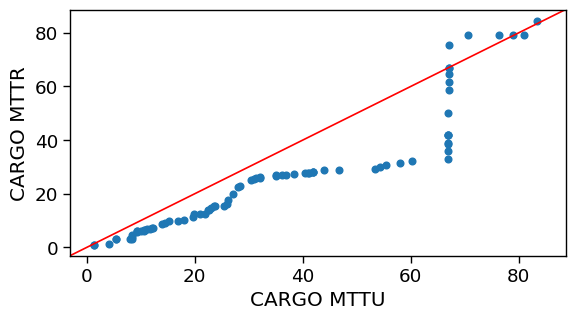

In [24]:
fig, ax = plt.subplots(figsize=(6.4, 3.2))

system_name = 'CARGO'

data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "mttu_vs_mttr"),
                         "mttu_vs_mttr_inverse_cargo.pdf")

df_tood_cargo = pd.DataFrame(s2[s2.system_name == system_name]['mttu_inverse_weighted'].sort_values())
df_pfet_cargo = pd.DataFrame(s2[s2.system_name == system_name]['mttr_inverse_weighted'].sort_values())

print(df_tood_cargo.shape)
print(df_pfet_cargo.shape)

df_tood_cargo = remove_outlier(df_tood_cargo)
df_pfet_cargo = remove_outlier(df_pfet_cargo)

print(df_tood_cargo.shape)
print(df_pfet_cargo.shape)

print (stats.ks_2samp(np.ndarray.flatten(df_tood_cargo.to_numpy()),
                      np.ndarray.flatten(df_pfet_cargo.to_numpy())))

# Create probability plots for both dataframes
pp1 = sm.ProbPlot(df_tood_cargo)
pp2 = sm.ProbPlot(df_pfet_cargo)

# Generate QQ plot for both dataframes
h = sm.qqplot_2samples(pp1, pp2, line='45', ax=ax)

# h.axes[0].set_xlim([0, 3500])
# h.axes[0].set_ylim([0, 3500])

# Display the plot
plt.xlabel('CARGO MTTU')
plt.ylabel('CARGO MTTR')
# plt.show()
plt.savefig(data_file, bbox_inches='tight')

In [1]:
fig, ax = plt.subplots(figsize=(6.4, 3.2))

system_name = 'NPM'

data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "mttu_vs_mttr"), "mttu_vs_mttr_inverse_npm.pdf")

df_tood_npm = pd.DataFrame(s2[s2.system_name == system_name]['mttu_inverse_weighted'].sort_values())
df_pfet_npm = pd.DataFrame(s2[s2.system_name == system_name]['mttr_inverse_weighted'].sort_values())

print(df_tood_npm.shape)
print(df_pfet_npm.shape)

df_tood_npm = remove_outlier(df_tood_npm)
df_pfet_npm = remove_outlier(df_pfet_npm)

print(df_tood_npm.shape)
print(df_pfet_npm.shape)

print (stats.ks_2samp(np.ndarray.flatten(df_tood_npm.to_numpy()),
                      np.ndarray.flatten(df_pfet_npm.to_numpy())))

# Create probability plots for both dataframes
pp1 = sm.ProbPlot(df_tood_npm)
pp2 = sm.ProbPlot(df_pfet_npm)

# Generate QQ plot for both dataframes
h = sm.qqplot_2samples(pp1, pp2, line='45', ax=ax)

# h.axes[0].set_xlim([0, 4500])
# h.axes[0].set_ylim([0, 4500])

# Display the plot
plt.xlabel('NPM time out of date')
plt.ylabel('NPM post fix\nexposure time')
# plt.show()
plt.savefig(data_file, dpi=300, bbox_inches='tight')

NameError: name 'plt' is not defined

(5158, 1)
(5158, 1)
(5158, 1)
(5158, 1)
KstestResult(statistic=0.1019775106630477, pvalue=9.27094619400728e-24, statistic_location=454.6, statistic_sign=-1)


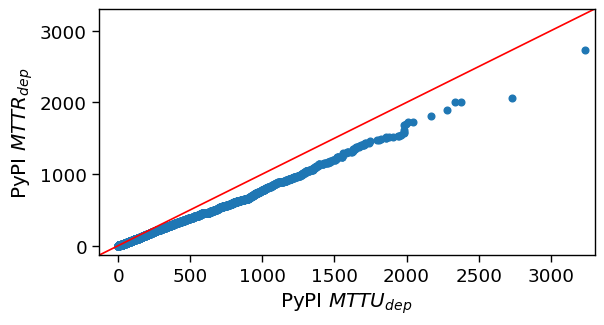

In [30]:
fig, ax = plt.subplots(figsize=(6.4, 3.2))

system_name = 'PYPI'

data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "mttu_vs_mttr"), "mttu_vs_mttr_pypi.pdf")

df_tood_pypi = pd.DataFrame(s2[s2.system_name == system_name]['avg_out_of_date_duration'].sort_values())
df_pfet_pypi = pd.DataFrame(s2[s2.system_name == system_name]['avg_post_fix_exposure_time'].sort_values())

print(df_tood_pypi.shape)
print(df_pfet_pypi.shape)

# df_tood_pypi = remove_outlier(df_tood_pypi)
# df_pfet_pypi = remove_outlier(df_pfet_pypi)

print(df_tood_pypi.shape)
print(df_pfet_pypi.shape)

print (stats.ks_2samp(np.ndarray.flatten(df_tood_pypi.to_numpy()),
                      np.ndarray.flatten(df_pfet_pypi.to_numpy())))

# Create probability plots for both dataframes
pp1 = sm.ProbPlot(df_tood_pypi)
pp2 = sm.ProbPlot(df_pfet_pypi)

# Generate QQ plot for both dataframes
h = sm.qqplot_2samples(pp1, pp2, line='45', ax=ax)

# h.axes[0].set_xlim([0, 3500])
# h.axes[0].set_ylim([0, 3500])

# Display the plot
plt.xlabel('PyPI ${MTTU}_{dep}$')
plt.ylabel('PyPI ${MTTR}_{dep}$')
# plt.show()
plt.savefig(data_file, bbox_inches='tight')

(22513, 1)
(22513, 1)
(20261, 1)
(20263, 1)
KstestResult(statistic=0.25739301250107893, pvalue=0.0, statistic_location=222.0, statistic_sign=-1)


/home/nanin/Documents/ncstate/update-metrics/.venv/lib/python3.12/site-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(
/home/nanin/Documents/ncstate/update-metrics/.venv/lib/python3.12/site-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(


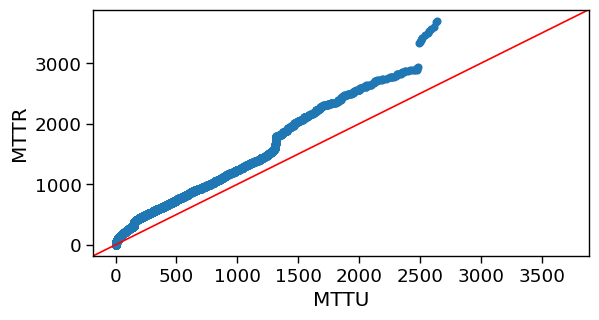

In [31]:
fig, ax = plt.subplots(figsize=(6.4, 3.2))

data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "mttu_vs_mttr"), "mttu_vs_mttr.pdf")

df_tood_ = pd.DataFrame(s2['avg_out_of_date_duration'].sort_values())
df_pfet_ = pd.DataFrame(s2['avg_post_fix_exposure_time'].sort_values())

print(df_tood_.shape)
print(df_pfet_.shape)

df_tood_ = remove_outlier(df_tood_)
df_pfet_ = remove_outlier(df_pfet_)

print(df_tood_.shape)
print(df_pfet_.shape)

print (stats.ks_2samp(np.ndarray.flatten(df_tood_.to_numpy()),
                      np.ndarray.flatten(df_pfet_.to_numpy())))

# Create probability plots for both dataframes
pp1 = sm.ProbPlot(df_tood_)
pp2 = sm.ProbPlot(df_pfet_)

# Generate QQ plot for both dataframes
h = sm.qqplot_2samples(pp1, pp2, line='45', ax=ax)

# h.axes[0].set_xlim([0, 4500])
# h.axes[0].set_ylim([0, 4500])

# Display the plot
plt.xlabel('MTTU')
plt.ylabel('MTTR')
# plt.show()
plt.savefig(data_file, bbox_inches='tight')

(22513, 1)
(22513, 1)
(22513, 1)
(22513, 1)
KstestResult(statistic=0.2650024430329143, pvalue=0.0, statistic_location=222.0, statistic_sign=-1)


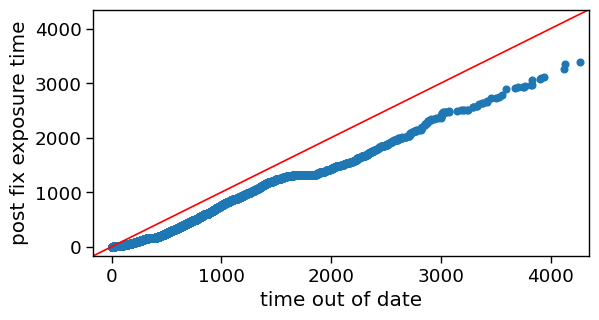

In [32]:
fig, ax = plt.subplots(figsize=(6.4, 3.2))

data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "tood-vs-pfet"), "tood-vs-pfet-1000-paper.png")

df_tood_ = pd.DataFrame(s2['avg_out_of_date_duration'].sort_values())
df_pfet_ = pd.DataFrame(s2['avg_post_fix_exposure_time'].sort_values())

print(df_tood_.shape)
print(df_pfet_.shape)

# df_tood_ = remove_outlier(df_tood_)
# df_pfet_ = remove_outlier(df_pfet_)

print(df_tood_.shape)
print(df_pfet_.shape)

print (stats.ks_2samp(np.ndarray.flatten(df_tood_.to_numpy()),
                      np.ndarray.flatten(df_pfet_.to_numpy())))

# Create probability plots for both dataframes
pp1 = sm.ProbPlot(df_tood_)
pp2 = sm.ProbPlot(df_pfet_)

# Generate QQ plot for both dataframes
h = sm.qqplot_2samples(pp1, pp2, line='45', ax=ax)

# h.axes[0].set_xlim([0, 1000])
# h.axes[0].set_ylim([0, 1000])

# Display the plot
plt.xlabel('time out of date')
plt.ylabel('post fix exposure time')
# plt.show()
plt.savefig(data_file, dpi=300, bbox_inches='tight')

(17711, 1)
(17711, 1)
(15940, 1)
(15945, 1)
KstestResult(statistic=0.28752605116474333, pvalue=0.0, statistic_location=222.0, statistic_sign=-1)


/home/nanin/Documents/ncstate/update-metrics/.venv/lib/python3.12/site-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(
/home/nanin/Documents/ncstate/update-metrics/.venv/lib/python3.12/site-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(


Text(0, 0.5, 'post fix exposure time')

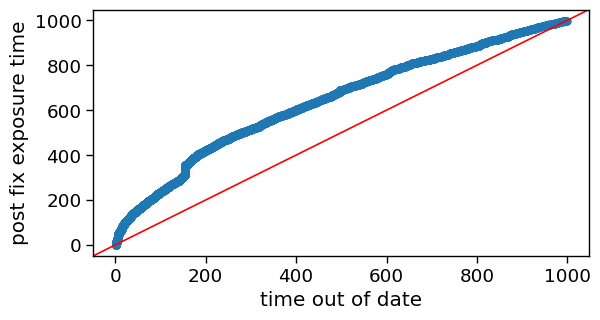

In [33]:
fig, ax = plt.subplots(figsize=(6.4, 3.2))

#data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "tood-vs-pfet"), "tood-vs-pfet.png")

df_tood_ = pd.DataFrame(s2[(s2['avg_post_fix_exposure_time'] < 1000) & (s2['avg_out_of_date_duration'] < 1000)]['avg_out_of_date_duration'].sort_values())
df_pfet_ = pd.DataFrame(s2[(s2['avg_post_fix_exposure_time'] < 1000) & (s2['avg_out_of_date_duration'] < 1000)]['avg_post_fix_exposure_time'].sort_values())

print(df_tood_.shape)
print(df_pfet_.shape)

df_tood_ = remove_outlier(df_tood_)
df_pfet_ = remove_outlier(df_pfet_)

print(df_tood_.shape)
print(df_pfet_.shape)

print (stats.ks_2samp(np.ndarray.flatten(df_tood_.to_numpy()),
                      np.ndarray.flatten(df_pfet_.to_numpy())))

# Create probability plots for both dataframes
pp1 = sm.ProbPlot(df_tood_)
pp2 = sm.ProbPlot(df_pfet_)

# Generate QQ plot for both dataframes
h = sm.qqplot_2samples(pp1, pp2, line='45', ax=ax)

# h.axes[0].set_xlim([0, 4500])
# h.axes[0].set_ylim([0, 4500])

# Display the plot
plt.xlabel('time out of date')
plt.ylabel('post fix exposure time')
# plt.show()
# plt.savefig(data_file, dpi=300, bbox_inches='tight')

(92, 1)
(92, 1)
(82, 1)
(82, 1)
KstestResult(statistic=0.6585365853658537, pvalue=4.0511177041140123e-17, statistic_location=0.2724853645556146, statistic_sign=-1)


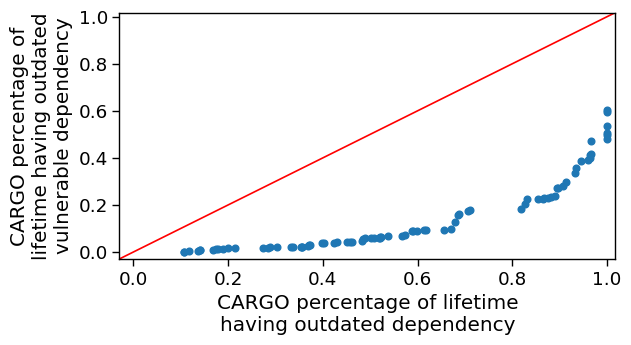

In [34]:
fig, ax = plt.subplots(figsize=(6.4, 3.2))

system_name = 'CARGO'

data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "tood-vs-pfet"), "tood-vs-pfet-cargo-ratio.png")

df_tood_cargo_ratio = pd.DataFrame(s2[s2.system_name == system_name]['avg_ratio_mttu'].sort_values())
df_pfet_cargo_ratio = pd.DataFrame(s2[s2.system_name == system_name]['avg_ratio_mttr'].sort_values())

print(df_tood_cargo_ratio.shape)
print(df_pfet_cargo_ratio.shape)

df_tood_cargo_ratio = remove_outlier(df_tood_cargo_ratio)
df_pfet_cargo_ratio = remove_outlier(df_pfet_cargo_ratio)

print(df_tood_cargo_ratio.shape)
print(df_pfet_cargo_ratio.shape)

print (stats.ks_2samp(np.ndarray.flatten(df_tood_cargo_ratio.to_numpy()),
                      np.ndarray.flatten(df_pfet_cargo_ratio.to_numpy())))

# Create probability plots for both dataframes
pp1 = sm.ProbPlot(df_tood_cargo_ratio)
pp2 = sm.ProbPlot(df_pfet_cargo_ratio)

# Generate QQ plot for both dataframes
h = sm.qqplot_2samples(pp1, pp2, line='45', ax=ax)

# h.axes[0].set_xlim([0, 3500])
# h.axes[0].set_ylim([0, 3500])

# Display the plot
plt.xlabel('CARGO percentage of lifetime\nhaving outdated dependency')
plt.ylabel('CARGO percentage of\nlifetime having outdated\nvulnerable dependency')
# plt.show()
plt.savefig(data_file, dpi=300, bbox_inches='tight')

(17263, 1)
(17263, 1)
(15536, 1)
(15536, 1)
KstestResult(statistic=0.4027420185375902, pvalue=0.0, statistic_location=0.2553500181356546, statistic_sign=-1)


/home/nanin/Documents/ncstate/update-metrics/.venv/lib/python3.12/site-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(


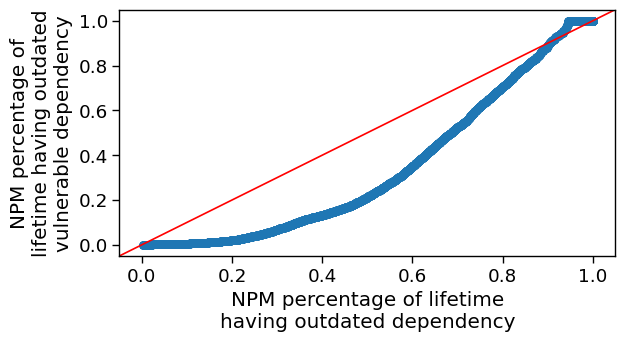

In [35]:
fig, ax = plt.subplots(figsize=(6.4, 3.2))

system_name = 'NPM'

data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "tood-vs-pfet"), "tood-vs-pfet-npm-ratio.png")

df_tood_npm_ratio = pd.DataFrame(s2[s2.system_name == system_name]['avg_ratio_mttu'].sort_values())
df_pfet_npm_ratio = pd.DataFrame(s2[s2.system_name == system_name]['avg_ratio_mttr'].sort_values())

print(df_tood_npm_ratio.shape)
print(df_pfet_npm_ratio.shape)

df_tood_npm_ratio = remove_outlier(df_tood_npm_ratio)
df_pfet_npm_ratio = remove_outlier(df_pfet_npm_ratio)

print(df_tood_npm_ratio.shape)
print(df_pfet_npm_ratio.shape)

print (stats.ks_2samp(np.ndarray.flatten(df_tood_npm_ratio.to_numpy()),
                      np.ndarray.flatten(df_pfet_npm_ratio.to_numpy())))

# Create probability plots for both dataframes
pp1 = sm.ProbPlot(df_tood_npm_ratio)
pp2 = sm.ProbPlot(df_pfet_npm_ratio)

# Generate QQ plot for both dataframes
h = sm.qqplot_2samples(pp1, pp2, line='45', ax=ax)

# h.axes[0].set_xlim([0, 3500])
# h.axes[0].set_ylim([0, 3500])

# Display the plot
plt.xlabel('NPM percentage of lifetime\nhaving outdated dependency')
plt.ylabel('NPM percentage of\nlifetime having outdated\nvulnerable dependency')
# plt.show()
plt.savefig(data_file, dpi=300, bbox_inches='tight')

(5158, 1)
(5158, 1)
(4642, 1)
(4642, 1)
KstestResult(statistic=0.13377854373115036, pvalue=1.3088820609855737e-36, statistic_location=0.2482739185571368, statistic_sign=-1)


/home/nanin/Documents/ncstate/update-metrics/.venv/lib/python3.12/site-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(
/home/nanin/Documents/ncstate/update-metrics/.venv/lib/python3.12/site-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(


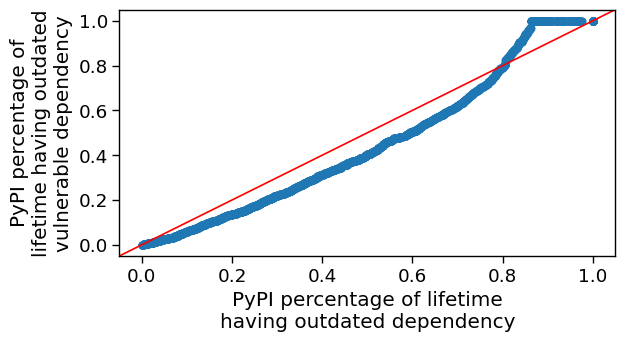

In [36]:
fig, ax = plt.subplots(figsize=(6.4, 3.2))

system_name = 'PYPI'

data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "tood-vs-pfet"), "tood-vs-pfet-pypi-ratio.png")

df_tood_pypi_ratio = pd.DataFrame(s2[s2.system_name == system_name]['avg_ratio_mttu'].sort_values())
df_pfet_pypi_ratio = pd.DataFrame(s2[s2.system_name == system_name]['avg_ratio_mttr'].sort_values())

print(df_tood_pypi_ratio.shape)
print(df_pfet_pypi_ratio.shape)

df_tood_pypi_ratio = remove_outlier(df_tood_pypi_ratio)
df_pfet_pypi_ratio = remove_outlier(df_pfet_pypi_ratio)

print(df_tood_pypi_ratio.shape)
print(df_pfet_pypi_ratio.shape)

print (stats.ks_2samp(np.ndarray.flatten(df_tood_pypi_ratio.to_numpy()),
                      np.ndarray.flatten(df_pfet_pypi_ratio.to_numpy())))

# Create probability plots for both dataframes
pp1 = sm.ProbPlot(df_tood_pypi_ratio)
pp2 = sm.ProbPlot(df_pfet_pypi_ratio)

# Generate QQ plot for both dataframes
h = sm.qqplot_2samples(pp1, pp2, line='45', ax=ax)

# h.axes[0].set_xlim([0, 3500])
# h.axes[0].set_ylim([0, 3500])

# Display the plot
plt.xlabel('PyPI percentage of lifetime\nhaving outdated dependency')
plt.ylabel('PyPI percentage of\nlifetime having outdated\nvulnerable dependency')
# plt.show()
plt.savefig(data_file, dpi=300, bbox_inches='tight')

<>:31: SyntaxWarning: invalid escape sequence '\p'
<>:32: SyntaxWarning: invalid escape sequence '\p'
<>:31: SyntaxWarning: invalid escape sequence '\p'
<>:32: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_2801/2758518913.py:31: SyntaxWarning: invalid escape sequence '\p'
  plt.xlabel('${MTTU}_{dep}^{\prime}$')
/tmp/ipykernel_2801/2758518913.py:32: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel('${MTTR}_{dep}^{\prime}$')


(22513, 1)
(22513, 1)
(22513, 1)
(22513, 1)
KstestResult(statistic=0.3357171412073025, pvalue=0.0, statistic_location=0.256150506512301, statistic_sign=-1)


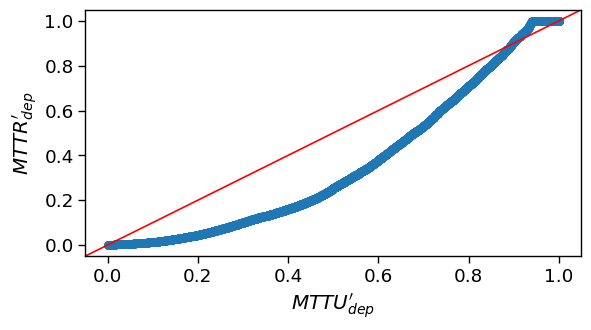

In [37]:
fig, ax = plt.subplots(figsize=(6.4, 3.2))

data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "mttu_vs_mttr"), "mttu_vs_mttr_ratio.pdf")

df_tood_ratio = pd.DataFrame(s2['avg_ratio_mttu'].sort_values())
df_pfet_ratio = pd.DataFrame(s2['avg_ratio_mttr'].sort_values())

print(df_tood_ratio.shape)
print(df_pfet_ratio.shape)

# df_tood_ratio = remove_outlier(df_tood_ratio)
# df_pfet_ratio = remove_outlier(df_pfet_ratio)

print(df_tood_ratio.shape)
print(df_pfet_ratio.shape)

print (stats.ks_2samp(np.ndarray.flatten(df_tood_ratio.to_numpy()),
                      np.ndarray.flatten(df_pfet_ratio.to_numpy())))

# Create probability plots for both dataframes
pp1 = sm.ProbPlot(df_tood_ratio)
pp2 = sm.ProbPlot(df_pfet_ratio)

# Generate QQ plot for both dataframes
h = sm.qqplot_2samples(pp1, pp2, line='45', ax=ax)

# h.axes[0].set_xlim([0, 3500])
# h.axes[0].set_ylim([0, 3500])

# Display the plot
plt.xlabel('${MTTU}_{dep}^{\prime}$')
plt.ylabel('${MTTR}_{dep}^{\prime}$')
# plt.show()
plt.savefig(data_file, dpi=300, bbox_inches='tight')

(22513, 1)
(22513, 1)
(20261, 1)
(20261, 1)
KstestResult(statistic=0.3349785301811362, pvalue=0.0, statistic_location=0.2666051660516605, statistic_sign=-1)


/home/nanin/Documents/ncstate/update-metrics/.venv/lib/python3.12/site-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(


Text(0, 0.5, 'percentage of\nlifetime having outdated\nvulnerable dependency')

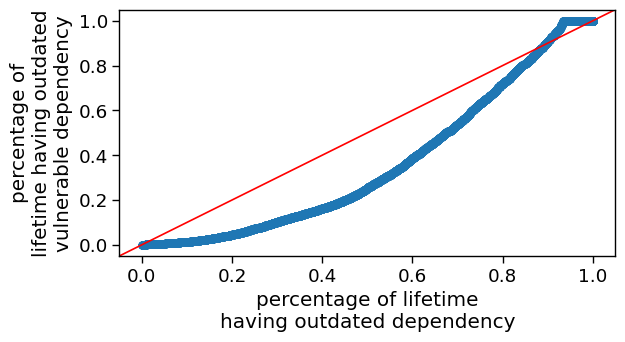

In [38]:
fig, ax = plt.subplots(figsize=(6.4, 3.2))

data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "tood-vs-pfet"), "tood-vs-pfet-ratio.png")

df_tood_ratio = pd.DataFrame(s2['avg_ratio_mttu'].sort_values())
df_pfet_ratio = pd.DataFrame(s2['avg_ratio_mttr'].sort_values())

print(df_tood_ratio.shape)
print(df_pfet_ratio.shape)

df_tood_ratio = remove_outlier(df_tood_ratio)
df_pfet_ratio = remove_outlier(df_pfet_ratio)

print(df_tood_ratio.shape)
print(df_pfet_ratio.shape)

print (stats.ks_2samp(np.ndarray.flatten(df_tood_ratio.to_numpy()),
                      np.ndarray.flatten(df_pfet_ratio.to_numpy())))

# Create probability plots for both dataframes
pp1 = sm.ProbPlot(df_tood_ratio)
pp2 = sm.ProbPlot(df_pfet_ratio)

# Generate QQ plot for both dataframes
h = sm.qqplot_2samples(pp1, pp2, line='45', ax=ax)

# h.axes[0].set_xlim([0, 3500])
# h.axes[0].set_ylim([0, 3500])

# Display the plot
plt.xlabel('percentage of lifetime\nhaving outdated dependency')
plt.ylabel('percentage of\nlifetime having outdated\nvulnerable dependency')
# plt.show()
#plt.savefig(data_file, dpi=300, bbox_inches='tight')

(17711, 1)
(17711, 1)


(15940, 1)
(15940, 1)
KstestResult(statistic=0.3409661229611041, pvalue=0.0, statistic_location=0.2243867243867243, statistic_sign=-1)


/home/nanin/Documents/ncstate/update-metrics/.venv/lib/python3.12/site-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(


Text(0, 0.5, 'percentage of\nlifetime having outdated\nvulnerable dependency')

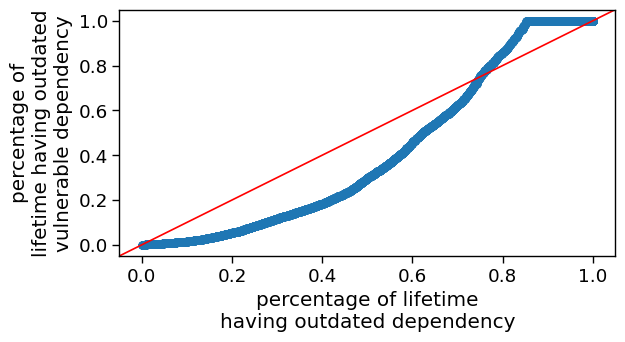

In [39]:
fig, ax = plt.subplots(figsize=(6.4, 3.2))

# data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "tood-vs-pfet"), "tood-vs-pfet-ratio.png")

df_tood_ratio = pd.DataFrame(s2[(s2['avg_post_fix_exposure_time'] < 1000) & (s2['avg_out_of_date_duration'] < 1000)]['avg_ratio_mttu'].sort_values())
df_pfet_ratio = pd.DataFrame(s2[(s2['avg_post_fix_exposure_time'] < 1000) & (s2['avg_out_of_date_duration'] < 1000)]['avg_ratio_mttr'].sort_values())

print(df_tood_ratio.shape)
print(df_pfet_ratio.shape)

df_tood_ratio = remove_outlier(df_tood_ratio)
df_pfet_ratio = remove_outlier(df_pfet_ratio)

print(df_tood_ratio.shape)
print(df_pfet_ratio.shape)

print (stats.ks_2samp(np.ndarray.flatten(df_tood_ratio.to_numpy()),
                      np.ndarray.flatten(df_pfet_ratio.to_numpy())))

# Create probability plots for both dataframes
pp1 = sm.ProbPlot(df_tood_ratio)
pp2 = sm.ProbPlot(df_pfet_ratio)

# Generate QQ plot for both dataframes
h = sm.qqplot_2samples(pp1, pp2, line='45', ax=ax)

# h.axes[0].set_xlim([0, 3500])
# h.axes[0].set_ylim([0, 3500])

# Display the plot
plt.xlabel('percentage of lifetime\nhaving outdated dependency')
plt.ylabel('percentage of\nlifetime having outdated\nvulnerable dependency')
# plt.show()
# plt.savefig(data_file, dpi=300, bbox_inches='tight')

# Statistical tests

In [37]:
df_tood_ratio = s2['mttu_inverse_weighted'].dropna().to_numpy()
df_pfet_ratio = s2['mttr_inverse_weighted'].dropna().to_numpy()
df_tood_ = s2['mttu_inverse_weighted'].dropna().to_numpy()
df_pfet_ = s2['mttr_inverse_weighted'].dropna().to_numpy()
print (df_tood_ratio.shape)
print (df_pfet_ratio.shape)

print(stats.ks_2samp(df_tood_ratio, df_pfet_ratio))
print(stats.ks_2samp(df_tood_, df_pfet_))
print(stats.mannwhitneyu(df_tood_ratio, df_pfet_ratio))
print(stats.mannwhitneyu(df_tood_, df_pfet_))

(22512,)
(22512,)
KstestResult(statistic=0.1898987206823028, pvalue=0.0, statistic_location=27.02459293181548, statistic_sign=-1)
KstestResult(statistic=0.1898987206823028, pvalue=0.0, statistic_location=27.02459293181548, statistic_sign=-1)
MannwhitneyuResult(statistic=313971126.0, pvalue=0.0)
MannwhitneyuResult(statistic=313971126.0, pvalue=0.0)


In [38]:
df_tood_ratio = s2['mttu_expo_weighted'].dropna().to_numpy()
df_pfet_ratio = s2['mttr_expo_weighted'].dropna().to_numpy()
df_tood_ = s2['mttu_expo_weighted'].dropna().to_numpy()
df_pfet_ = s2['mttr_expo_weighted'].dropna().to_numpy()
print (df_tood_ratio.shape)
print (df_pfet_ratio.shape)

print(stats.ks_2samp(df_tood_ratio, df_pfet_ratio))
print(stats.ks_2samp(df_tood_, df_pfet_))
print(stats.mannwhitneyu(df_tood_ratio, df_pfet_ratio))
print(stats.mannwhitneyu(df_tood_, df_pfet_))

(22512,)
(22512,)
KstestResult(statistic=0.11145167022032698, pvalue=3.096334692140323e-122, statistic_location=28.10600193478979, statistic_sign=-1)
KstestResult(statistic=0.11145167022032698, pvalue=3.096334692140323e-122, statistic_location=28.10600193478979, statistic_sign=-1)
MannwhitneyuResult(statistic=280328761.5, pvalue=5.872202183459306e-85)
MannwhitneyuResult(statistic=280328761.5, pvalue=5.872202183459306e-85)


In [41]:
df_tood_ratio = s2[(s2['avg_post_fix_exposure_time'] < 1000) & (s2['avg_out_of_date_duration'] < 1000)]['avg_ratio_mttu'].dropna().to_numpy()
df_pfet_ratio = s2[(s2['avg_post_fix_exposure_time'] < 1000) & (s2['avg_out_of_date_duration'] < 1000)]['avg_ratio_mttr'].dropna().to_numpy()
df_tood_ = s2[(s2['avg_post_fix_exposure_time'] < 1000) & (s2['avg_out_of_date_duration'] < 1000)]['avg_out_of_date_duration'].dropna().to_numpy()
df_pfet_ = s2[(s2['avg_post_fix_exposure_time'] < 1000) & (s2['avg_out_of_date_duration'] < 1000)]['avg_post_fix_exposure_time'].dropna().to_numpy()
print (df_tood_ratio.shape)
print (df_pfet_ratio.shape)

print(stats.ks_2samp(df_tood_ratio, df_pfet_ratio))
print(stats.ks_2samp(df_tood_, df_pfet_))
print(stats.mannwhitneyu(df_tood_ratio, df_pfet_ratio))
print(stats.mannwhitneyu(df_tood_, df_pfet_))

(17711,)
(17711,)
KstestResult(statistic=0.34611258539890466, pvalue=0.0, statistic_location=0.2258180510607695, statistic_sign=-1)
KstestResult(statistic=0.2960871774603354, pvalue=0.0, statistic_location=193.0, statistic_sign=-1)
MannwhitneyuResult(statistic=218387258.0, pvalue=0.0)
MannwhitneyuResult(statistic=213629648.5, pvalue=0.0)


In [39]:
# Extract the data
avg_out_of_date_duration = s2['mttu_inverse_weighted'].dropna().to_numpy()
avg_post_fix_exposure_time = s2['mttr_inverse_weighted'].dropna().to_numpy()

# # Unpaired two-sample t-test
# _, p_greater = stats.ttest_ind(avg_out_of_date_duration + bound, avg_post_fix_exposure_time, alternative='greater')
# _, p_less = stats.ttest_ind(avg_out_of_date_duration - bound, avg_post_fix_exposure_time, alternative='less')
# # Choose the maximum p-value
# pval = max(p_less, p_greater)

# print(f"P-value: {pval}")

# Perform the two-sample t-test
t_stat, p_value = stats.ttest_ind(avg_out_of_date_duration, avg_post_fix_exposure_time)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 21.715846692709263
P-value: 4.979998047270344e-104


In [30]:
s2.dtypes

system_name               object
from_package_name         object
mttu_expo_weighted       float64
mttu_inverse_weighted    float64
mttr_expo_weighted        object
mttr_inverse_weighted    float64
dtype: object

In [40]:
# Extract the data
avg_out_of_date_duration = s2['mttu_expo_weighted'].dropna().to_numpy()
avg_post_fix_exposure_time = s2['mttr_expo_weighted'].dropna().to_numpy()

# # Unpaired two-sample t-test
# _, p_greater = stats.ttest_ind(avg_out_of_date_duration + bound, avg_post_fix_exposure_time, alternative='greater')
# _, p_less = stats.ttest_ind(avg_out_of_date_duration - bound, avg_post_fix_exposure_time, alternative='less')
# # Choose the maximum p-value
# pval = max(p_less, p_greater)

# print(f"P-value: {pval}")

# Perform the two-sample t-test
t_stat, p_value = stats.ttest_ind(avg_out_of_date_duration, avg_post_fix_exposure_time)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 3.120237425796394
P-value: 0.0018081946332077672


## Analysis with < 2000 days

### TOOD and PFET

(22115, 1)
(22419, 1)
(19903, 1)
(20188, 1)
KstestResult(statistic=0.25566839721490126, pvalue=0.0, statistic_location=222.0, statistic_sign=-1)
Epps_Singleton_2sampResult(statistic=3562.13249642311, pvalue=0.0)
Anderson_ksampResult(statistic=1902.7234302723946, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), pvalue=0.001)


/home/nanin/Documents/ncstate/update-metrics/.venv/lib/python3.12/site-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(
/home/nanin/Documents/ncstate/update-metrics/.venv/lib/python3.12/site-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(
/tmp/ipykernel_2801/103540219.py:23: UserWarning: p-value floored: true value smaller than 0.001. Consider specifying `method` (e.g. `method=stats.PermutationMethod()`.)
  print (stats.anderson_ksamp([np.ndarray.flatten(df_tood_.to_numpy()), np.ndarray.flatten(df_pfet_.to_numpy())]))


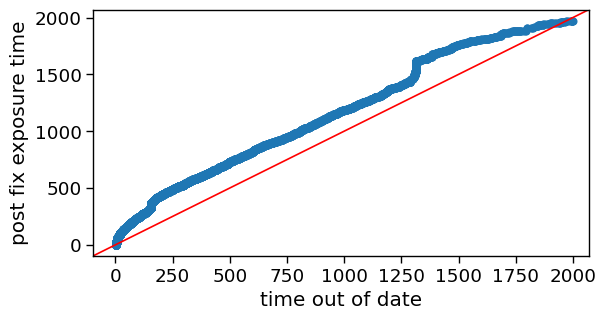

In [43]:
fig, ax = plt.subplots(figsize=(6.4, 3.2))

data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "tood-vs-pfet"), "tood-vs-pfet-2000.png")

df_tood_ = pd.DataFrame(s2[s2.avg_out_of_date_duration <= 2000]['avg_out_of_date_duration'].sort_values())
df_pfet_ = pd.DataFrame(s2[s2.avg_post_fix_exposure_time <= 2000]['avg_post_fix_exposure_time'].sort_values())

print(df_tood_.shape)
print(df_pfet_.shape)

df_tood_ = remove_outlier(df_tood_)
df_pfet_ = remove_outlier(df_pfet_)

print(df_tood_.shape)
print(df_pfet_.shape)

print (stats.ks_2samp(np.ndarray.flatten(df_tood_.to_numpy()),
                      np.ndarray.flatten(df_pfet_.to_numpy())))

print (stats.epps_singleton_2samp(np.ndarray.flatten(df_tood_.to_numpy()),
                                  np.ndarray.flatten(df_pfet_.to_numpy())))

print (stats.anderson_ksamp([np.ndarray.flatten(df_tood_.to_numpy()), np.ndarray.flatten(df_pfet_.to_numpy())]))

# Create probability plots for both dataframes
pp1 = sm.ProbPlot(df_tood_)
pp2 = sm.ProbPlot(df_pfet_)

# Generate QQ plot for both dataframes
h = sm.qqplot_2samples(pp1, pp2, line='45', ax=ax)

# h.axes[0].set_xlim([0, 4500])
# h.axes[0].set_ylim([0, 4500])

# Display the plot
plt.xlabel('time out of date')
plt.ylabel('post fix exposure time')
# plt.show()
plt.savefig(data_file, dpi=300, bbox_inches='tight')

(18747, 1)
(20440, 1)
(18747, 1)
(20440, 1)
KstestResult(statistic=0.2711744877223409, pvalue=0.0, statistic_location=196.0, statistic_sign=-1)
Epps_Singleton_2sampResult(statistic=3720.816293157688, pvalue=0.0)
Anderson_ksampResult(statistic=2098.096407353045, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), pvalue=0.001)


/tmp/ipykernel_2801/234525261.py:23: UserWarning: p-value floored: true value smaller than 0.001. Consider specifying `method` (e.g. `method=stats.PermutationMethod()`.)
  print (stats.anderson_ksamp([np.ndarray.flatten(df_tood_.to_numpy()), np.ndarray.flatten(df_pfet_.to_numpy())]))


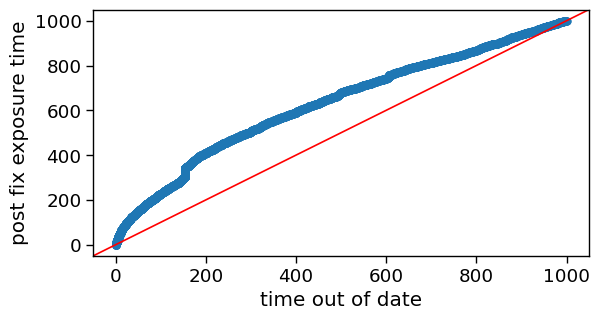

In [44]:
fig, ax = plt.subplots(figsize=(6.4, 3.2))

data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "tood-vs-pfet"), "tood-vs-pfet-1000.png")

df_tood_ = pd.DataFrame(s2[s2.avg_out_of_date_duration <= 1000]['avg_out_of_date_duration'].sort_values())
df_pfet_ = pd.DataFrame(s2[s2.avg_post_fix_exposure_time <= 1000]['avg_post_fix_exposure_time'].sort_values())

print(df_tood_.shape)
print(df_pfet_.shape)

# df_tood_ = remove_outlier(df_tood_)
# df_pfet_ = remove_outlier(df_pfet_)

print(df_tood_.shape)
print(df_pfet_.shape)

print (stats.ks_2samp(np.ndarray.flatten(df_tood_.to_numpy()),
                      np.ndarray.flatten(df_pfet_.to_numpy())))

print (stats.epps_singleton_2samp(np.ndarray.flatten(df_tood_.to_numpy()),
                                  np.ndarray.flatten(df_pfet_.to_numpy())))

print (stats.anderson_ksamp([np.ndarray.flatten(df_tood_.to_numpy()), np.ndarray.flatten(df_pfet_.to_numpy())]))

# Create probability plots for both dataframes
pp1 = sm.ProbPlot(df_tood_)
pp2 = sm.ProbPlot(df_pfet_)

# Generate QQ plot for both dataframes
h = sm.qqplot_2samples(pp1, pp2, line='45', ax=ax)

# h.axes[0].set_xlim([0, 4500])
# h.axes[0].set_ylim([0, 4500])

# Display the plot
plt.xlabel('time out of date')
plt.ylabel('post fix exposure time')
# plt.show()
plt.savefig(data_file, dpi=300, bbox_inches='tight')

(18747, 1)
(20440, 1)
(16872, 1)
(18398, 1)
KstestResult(statistic=0.2621127773232407, pvalue=0.0, statistic_location=184.0, statistic_sign=-1)


/home/nanin/Documents/ncstate/update-metrics/.venv/lib/python3.12/site-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(
/home/nanin/Documents/ncstate/update-metrics/.venv/lib/python3.12/site-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(


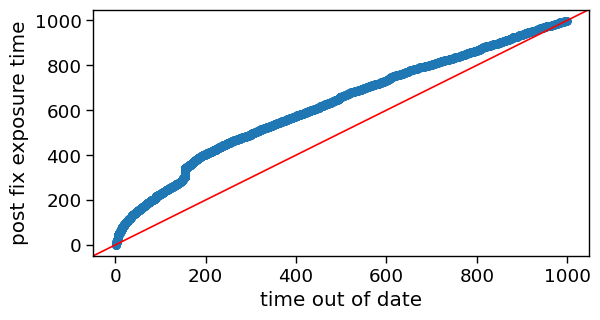

In [45]:
fig, ax = plt.subplots(figsize=(6.4, 3.2))

data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "tood-vs-pfet"), "tood-vs-pfet-100-rand.png")

df_tood_ = pd.DataFrame(s2[s2.avg_out_of_date_duration <= 1000]['avg_out_of_date_duration'].sort_values())
df_pfet_ = pd.DataFrame(s2[s2.avg_post_fix_exposure_time <= 1000]['avg_post_fix_exposure_time'].sort_values())

print(df_tood_.shape)
print(df_pfet_.shape)

df_tood_ = remove_outlier(df_tood_)
df_pfet_ = remove_outlier(df_pfet_)

print(df_tood_.shape)
print(df_pfet_.shape)

print (stats.ks_2samp(np.ndarray.flatten(df_tood_.to_numpy()),
                      np.ndarray.flatten(df_pfet_.to_numpy())))

# Create probability plots for both dataframes
pp1 = sm.ProbPlot(df_tood_)
pp2 = sm.ProbPlot(df_pfet_)

# Generate QQ plot for both dataframes
h = sm.qqplot_2samples(pp1, pp2, line='45', ax=ax)

# h.axes[0].set_xlim([0, 4500])
# h.axes[0].set_ylim([0, 4500])

# Display the plot
plt.xlabel('time out of date')
plt.ylabel('post fix exposure time')
# plt.show()
plt.savefig(data_file, dpi=300, bbox_inches='tight')

(18747, 1)
(18747, 1)
avg_post_fix_exposure_time    2953.0
dtype: float64
(16872, 1)
(16872, 1)
KstestResult(statistic=0.26997392128971076, pvalue=0.0, statistic_location=183.0, statistic_sign=-1)
Epps_Singleton_2sampResult(statistic=4524.595248950541, pvalue=0.0)
Anderson_ksampResult(statistic=1677.430726179105, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), pvalue=0.001)


/home/nanin/Documents/ncstate/update-metrics/.venv/lib/python3.12/site-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(
/home/nanin/Documents/ncstate/update-metrics/.venv/lib/python3.12/site-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(
/tmp/ipykernel_2801/4032469132.py:25: UserWarning: p-value floored: true value smaller than 0.001. Consider specifying `method` (e.g. `method=stats.PermutationMethod()`.)
  print (stats.anderson_ksamp([np.ndarray.flatten(df_tood_.to_numpy()), np.ndarray.flatten(df_pfet_.to_numpy())]))


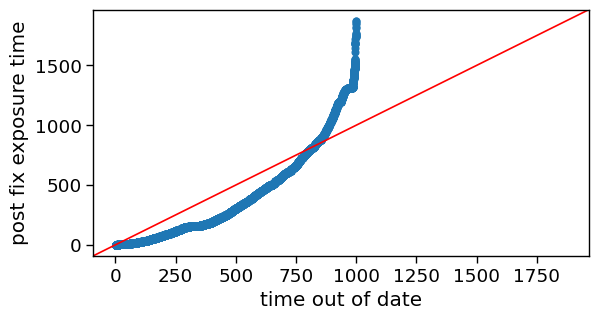

In [46]:
fig, ax = plt.subplots(figsize=(6.4, 3.2))

data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "tood-vs-pfet"), "tood-vs-pfet-2000-avg-only.png")

df_tood_ = pd.DataFrame(s2[s2.avg_out_of_date_duration <= 1000]['avg_out_of_date_duration'].sort_values())
df_pfet_ = pd.DataFrame(s2[s2.avg_out_of_date_duration <= 1000]['avg_post_fix_exposure_time'].sort_values())

print(df_tood_.shape)
print(df_pfet_.shape)

print (df_pfet_.max())

df_tood_ = remove_outlier(df_tood_)
df_pfet_ = remove_outlier(df_pfet_)

print(df_tood_.shape)
print(df_pfet_.shape)

print (stats.ks_2samp(np.ndarray.flatten(df_tood_.to_numpy()),
                      np.ndarray.flatten(df_pfet_.to_numpy())))

print (stats.epps_singleton_2samp(np.ndarray.flatten(df_tood_.to_numpy()),
                                  np.ndarray.flatten(df_pfet_.to_numpy())))

print (stats.anderson_ksamp([np.ndarray.flatten(df_tood_.to_numpy()), np.ndarray.flatten(df_pfet_.to_numpy())]))

# Create probability plots for both dataframes
pp1 = sm.ProbPlot(df_tood_)
pp2 = sm.ProbPlot(df_pfet_)

# Generate QQ plot for both dataframes
h = sm.qqplot_2samples(pp1, pp2, line='45', ax=ax)

# h.axes[0].set_xlim([0, 4500])
# h.axes[0].set_ylim([0, 4500])

# Display the plot
plt.xlabel('time out of date')
plt.ylabel('post fix exposure time')
# plt.show()
plt.savefig(data_file, dpi=300, bbox_inches='tight')

### ratio

(22115, 1)
(22419, 1)
(19903, 1)
(20177, 1)
KstestResult(statistic=0.3324561104057758, pvalue=0.0, statistic_location=0.2666051660516605, statistic_sign=-1)


/home/nanin/Documents/ncstate/update-metrics/.venv/lib/python3.12/site-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(


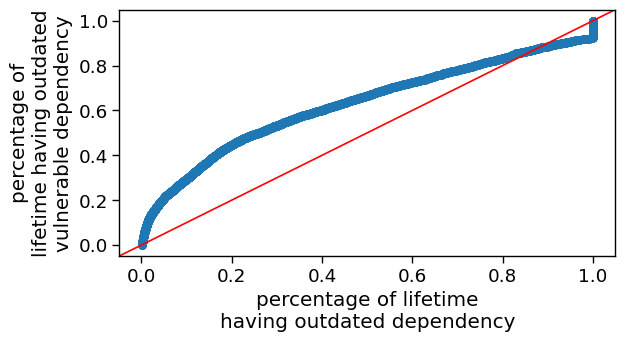

In [47]:
fig, ax = plt.subplots(figsize=(6.4, 3.2))

data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "tood-vs-pfet"), "tood-vs-pfet-ratio-2000.png")

df_tood_ratio = pd.DataFrame(s2[s2.avg_out_of_date_duration <= 2000]['avg_ratio_mttu'].sort_values())
df_pfet_ratio = pd.DataFrame(s2[s2.avg_post_fix_exposure_time <= 2000]['avg_ratio_mttr'].sort_values())

print(df_tood_ratio.shape)
print(df_pfet_ratio.shape)

df_tood_ratio = remove_outlier(df_tood_ratio)
df_pfet_ratio = remove_outlier(df_pfet_ratio)

print(df_tood_ratio.shape)
print(df_pfet_ratio.shape)

print (stats.ks_2samp(np.ndarray.flatten(df_tood_ratio.to_numpy()),
                      np.ndarray.flatten(df_pfet_ratio.to_numpy())))

# Create probability plots for both dataframes
pp1 = sm.ProbPlot(df_tood_ratio)
pp2 = sm.ProbPlot(df_pfet_ratio)

# Generate QQ plot for both dataframes
h = sm.qqplot_2samples(pp1, pp2, line='45', ax=ax)

# h.axes[0].set_xlim([0, 3500])
# h.axes[0].set_ylim([0, 3500])

# Display the plot
plt.xlabel('percentage of lifetime\nhaving outdated dependency')
plt.ylabel('percentage of\nlifetime having outdated\nvulnerable dependency')
# plt.show()
plt.savefig(data_file, dpi=300, bbox_inches='tight')

In [48]:
s2[s2.avg_out_of_date_duration > s2.avg_post_fix_exposure_time]

,system_name,from_package_name,avg_out_of_date_duration,avg_ratio_mttu,avg_post_fix_exposure_time,avg_ratio_mttr
0,CARGO,ahrs,623.333333,0.518868,247.000000,0.299031
2,CARGO,almel,1237.000000,0.735434,9.000000,0.005351
3,CARGO,amp,1495.000000,0.913256,375.000000,0.229078
4,CARGO,broot,1031.000000,0.656270,563.000000,0.358370
5,CARGO,cargo-benchcmp,1059.000000,0.368861,50.000000,0.017416
...,...,...,...,...,...,...
22508,PYPI,zqpy,483.350000,0.441698,454.250000,0.397419
22509,PYPI,zsl,645.142857,0.579123,348.000000,0.292806
22510,PYPI,zucchini,1982.166667,0.896367,709.333333,0.298583
22511,PYPI,zuul,144.061224,0.103920,20.000000,0.011628


## CDF plots

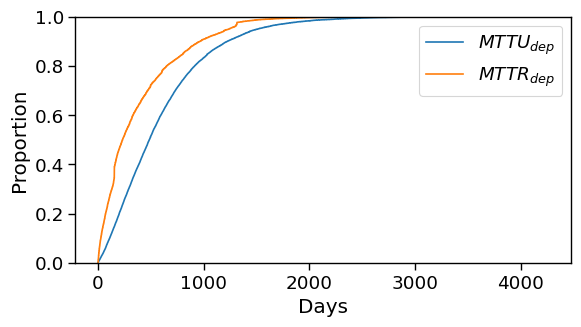

In [49]:
fig, ax = plt.subplots(figsize=(6.4, 3.2))

data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "mttu_vs_mttr"), "mttu_vs_mttr_cdf.pdf")

sns.ecdfplot(data=s2, x='avg_out_of_date_duration', ax=ax, label='$MTTU_{dep}$')
sns.ecdfplot(data=s2, x='avg_post_fix_exposure_time', ax=ax, label='$MTTR_{dep}$')

# Display the plot
#plt.xlabel('time out of date')
plt.xlabel('Days')
plt.legend()
# plt.show()
plt.savefig(data_file, bbox_inches='tight')

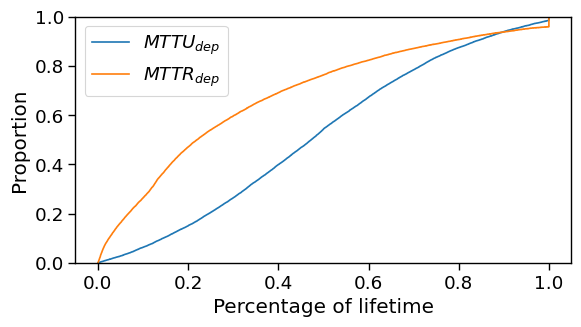

In [50]:
fig, ax = plt.subplots(figsize=(6.4, 3.2))

data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "tood-vs-pfet"), "tood-vs-pfet-ratio-cdf.png")

sns.ecdfplot(data=s2, x='avg_ratio_mttu', ax=ax, label='$MTTU_{dep}$')
sns.ecdfplot(data=s2, x='avg_ratio_mttr', ax=ax, label='$MTTR_{dep}$')

# Display the plot
#plt.xlabel('time out of date')
plt.xlabel('Percentage of lifetime')
plt.legend()
# plt.show()
plt.savefig(data_file, dpi=300, bbox_inches='tight')

# ecosystem stats

In [51]:
data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "data"), "data-statistics"), "system_year_pkgrelcnt.csv")
print (data_file)
df_system = pd.read_csv(data_file,
                header=0,
                sep=',',
                on_bad_lines='skip',
                usecols=['system_name', 'year_', 'count'],
                )
rows = df_system.shape[0]
print (df_system.shape)
display(df_system.head())

/home/nanin/Documents/ncstate/update-metrics/code/visualize-data/../../data/data-statistics/system_year_pkgrelcnt.csv


FileNotFoundError: [Errno 2] No such file or directory: '/home/nanin/Documents/ncstate/update-metrics/code/visualize-data/../../data/data-statistics/system_year_pkgrelcnt.csv'

In [ ]:
df_system.drop(df_system[df_system.year_ > 2022].index, inplace=True)

NameError: name 'df_system' is not defined

NameError: name 'df_system' is not defined

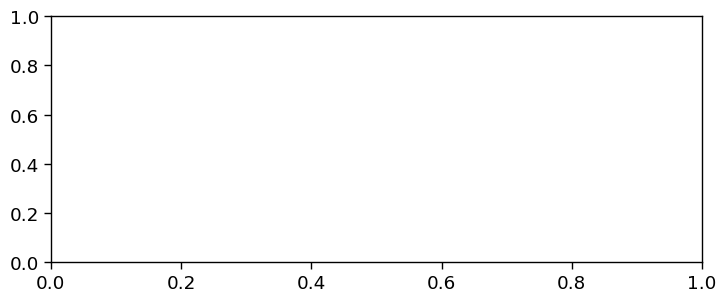

In [ ]:
data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "data-statistics"), "system_year_pkgcnt.png")

fig, ax = plt.subplots(figsize=(8.4, 3.2))
ax = sns.barplot(data=df_system, x='year_', y='count', hue='system_name',
                    hue_order=['CARGO', 'NPM', 'PYPI'], palette='rainbow')

ax.set_xlabel('Year')
ax.set_ylabel('Released packages')
ax.set_yscale('log')
plt.xticks(rotation=45, ha='right')
# plt.title('Time out of date (maintained)\n')
plt.savefig(data_file, bbox_inches='tight')

## Statistical Tests

In [41]:
# Extract the data
mttu_inverse_weighted = s2['mttu_inverse_weighted'].dropna().to_numpy()
mttr_inverse_weighted = s2['mttr_inverse_weighted'].dropna().to_numpy()
mttu_expo_weighted = s2['mttu_expo_weighted'].dropna().to_numpy()
mttr_expo_weighted = s2['mttr_expo_weighted'].dropna().to_numpy()

# # Unpaired two-sample t-test
# _, p_greater = stats.ttest_ind(avg_out_of_date_duration + bound, avg_post_fix_exposure_time, alternative='greater')
# _, p_less = stats.ttest_ind(avg_out_of_date_duration - bound, avg_post_fix_exposure_time, alternative='less')
# # Choose the maximum p-value
# pval = max(p_less, p_greater)

# print(f"P-value: {pval}")

# Perform the two-sample t-test
t_stat, p_value = stats.ttest_ind(mttu_inverse_weighted, mttr_inverse_weighted)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

t_stat, p_value = stats.ttest_rel(mttu_inverse_weighted, mttr_inverse_weighted)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 21.715846692709263
P-value: 4.979998047270344e-104
T-statistic: 34.05584483413638
P-value: 6.397302328065962e-248


In [42]:
from scipy.stats import ranksums, mannwhitneyu

def tost_mult(x, y, r, transform=None, type="mannwhitneyu"):
    '''
    Returns
    -------
    pvalue : float
        pvalue of the non-equivalence test
    t1, pv1 : tuple of floats
        test statistic and pvalue for lower threshold test
    t2, pv2 : tuple of floats
        test statistic and pvalue for upper threshold test
    Notes
    -----
    tested on only one example
    uses stats.ttest_1samp which doesn't have a real one-sided option
    '''
    if transform:
        y = transform(y)
        x = transform(x)
    if type=="mannwhitneyu":
        u1, pv1 = mannwhitneyu(x*r,y)
        u2, pv2 = mannwhitneyu(y,x/r)
    else: #ranksums
        u1, pv1 = ranksums(x*r,y)
        u2, pv2 = ranksums(y,x/r)
    return max(pv1, pv2), (u1, pv1), (u2, pv2)

def tost_add(x, y, d, transform=None):
    if transform:
        y = transform(y)
        x = transform(x)

    u1, pv1 = mannwhitneyu(x-d,y, method="exact")
    u2, pv2 = mannwhitneyu(y,x+d, method="exact")
    return max(pv1, pv2), (u1, pv1), (u2, pv2)

In [43]:
tost_mult(mttu_inverse_weighted, mttr_inverse_weighted, 0.8, transform=np.asarray, type="mannwhitneyu")

(1.7752803845297712e-154,
 (289905881.0, 1.7752803845297712e-154),
 (170295497.0, 0.0))

In [44]:
tost_mult(mttu_expo_weighted, mttr_expo_weighted, 0.8, transform=np.asarray, type="mannwhitneyu")

(0.0015570722081785168,
 (249032295.5, 0.0015570722081785168),
 (195813881.5, 0.0))

In [45]:
tost_mult(s2[ s2.system_name == 'CARGO']['mttu_inverse_weighted'].dropna().to_numpy(),
            s2[ s2.system_name == 'CARGO']['mttr_inverse_weighted'].dropna().to_numpy(), 0.8, transform=np.asarray, type="mannwhitneyu")

(0.23993124249261044,
 (4657.0, 0.23993124249261044),
 (2805.0, 7.846805060565494e-05))

In [46]:
tost_mult(s2[ s2.system_name == 'CARGO']['mttu_expo_weighted'].dropna().to_numpy(),
            s2[ s2.system_name == 'CARGO']['mttr_expo_weighted'].dropna().to_numpy(), 0.8, transform=np.asarray, type="mannwhitneyu")

(0.5162253902874554,
 (4467.0, 0.5162253902874554),
 (2806.0, 7.938038891360076e-05))

In [47]:
tost_mult(s2[ s2.system_name == 'NPM']['mttu_inverse_weighted'].dropna().to_numpy(),
            s2[ s2.system_name == 'NPM']['mttr_inverse_weighted'].dropna().to_numpy(), 0.8, transform=np.asarray, type="mannwhitneyu")

(1.2053855918587815e-164,
 (174308074.0, 1.2053855918587815e-164),
 (97711775.0, 0.0))

In [48]:
tost_mult(s2[ s2.system_name == 'NPM']['mttu_expo_weighted'].dropna().to_numpy(),
            s2[ s2.system_name == 'NPM']['mttr_expo_weighted'].dropna().to_numpy(), 0.8, transform=np.asarray, type="mannwhitneyu")

(0.03597644012712103,
 (147046522.0, 0.03597644012712103),
 (116004401.0, 6.065985736807771e-278))

In [49]:
tost_mult(s2[ s2.system_name == 'PYPI']['mttu_inverse_weighted'].dropna().to_numpy(),
            s2[ s2.system_name == 'PYPI']['mttr_inverse_weighted'].dropna().to_numpy(), 0.8, transform=np.asarray, type="mannwhitneyu")

(0.2582060386343844,
 (13473481.0, 0.2582060386343844),
 (9817031.0, 1.621238550855569e-117))

In [50]:
tost_mult(s2[ s2.system_name == 'PYPI']['mttu_expo_weighted'].dropna().to_numpy(),
            s2[ s2.system_name == 'PYPI']['mttr_expo_weighted'].dropna().to_numpy(), 0.8, transform=np.asarray, type="mannwhitneyu")

(0.0005170694337748833,
 (12777412.5, 0.0005170694337748833),
 (10043675.5, 5.62313740738975e-103))

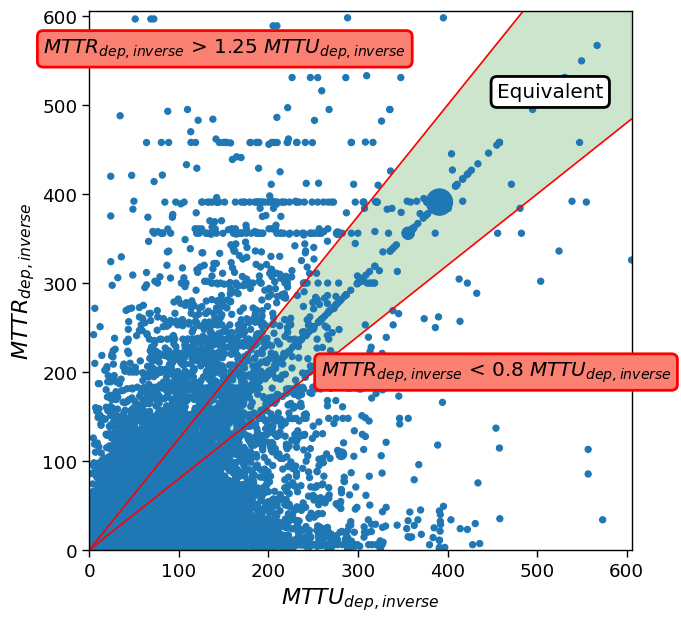

In [51]:

def plot_bubble(x, y, x_label, y_label, file_name=None):
        u, c = np.unique(np.c_[x,y], return_counts=True, axis=0)

        fig, ax = plt.subplots(figsize=(7,7))

        ax.text(0.25*max(x),0.93*max(x), "{} > 1.25 {}".format(y_label, x_label),
                ha="center", va="center",
                bbox=dict(boxstyle="round",
                        fc="salmon", ec="red", lw=2))
        ax.text(0.75*max(x), 200, "{} < 0.8 {}".format(y_label, x_label),
                ha="center", va="center",
                bbox=dict(boxstyle="round",
                        fc="salmon", ec="red", lw=2))
        ax.text(max(x)*0.85, max(x)*0.85, "Equivalent",
                ha="center", va="center",
                bbox=dict(boxstyle="round",
                        fc="white", ec="black", lw=2))
        plt.fill_between(np.arange(0,max(x)), 0, np.arange(0,max(x))/0.8, alpha=0.2, color="green")
        plt.fill_between(np.arange(0,max(x)), 0, np.arange(0,max(x))*0.8, alpha=1, color="white")
        ax.plot(np.arange(0,max(x)), np.arange(0,max(x))/0.8, color="red")
        ax.plot(np.arange(0,max(x)), 0.8*np.arange(0,max(x)), color="red")
        ax.set_xlim([-0.05,max(x)])
        ax.set_ylim([-0.05,max(x)])
        ax.scatter(u[:,0],u[:,1],s=c*20)
        ax.set_xlabel(x_label, fontsize=16)
        ax.set_ylabel(y_label, fontsize=16)

        if file_name is not None:
                data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "mttu_vs_mttr"), file_name)
                plt.savefig(data_file, dpi=300, bbox_inches='tight')
        plt.show()

plot_bubble(mttu_inverse_weighted,mttr_inverse_weighted,"${MTTU}_{dep,inverse}$", "${MTTR}_{dep,inverse}$", "mttu_vs_mttr_TOST_inverse.pdf")

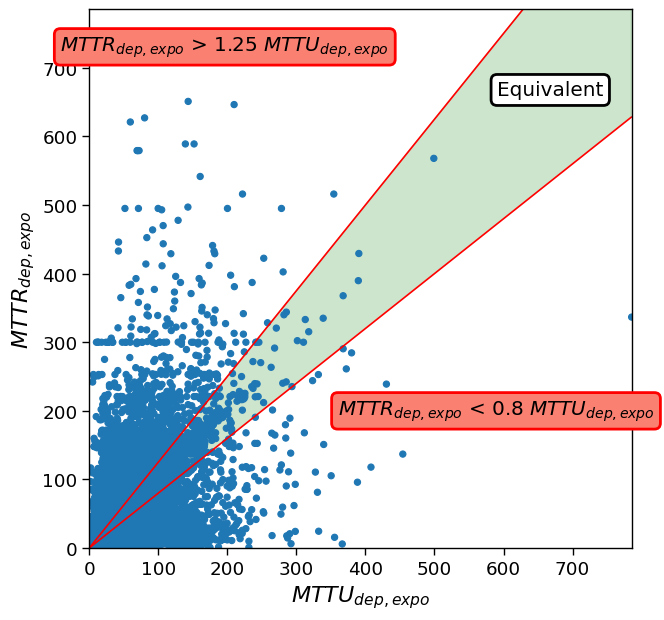

In [52]:
plot_bubble(mttu_expo_weighted,mttr_expo_weighted,"${MTTU}_{dep,expo}$", "${MTTR}_{dep,expo}$", "mttu_vs_mttr_TOST_expo.pdf")

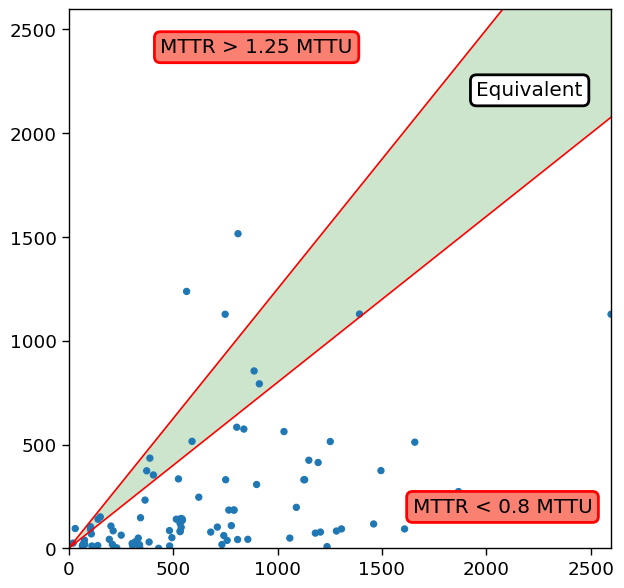

In [138]:
plot_bubble(s2[ s2.system_name == 'CARGO']['avg_out_of_date_duration'].dropna().to_numpy(),
            s2[ s2.system_name == 'CARGO']['avg_post_fix_exposure_time'].dropna().to_numpy(),"MTTU", "MTTR")

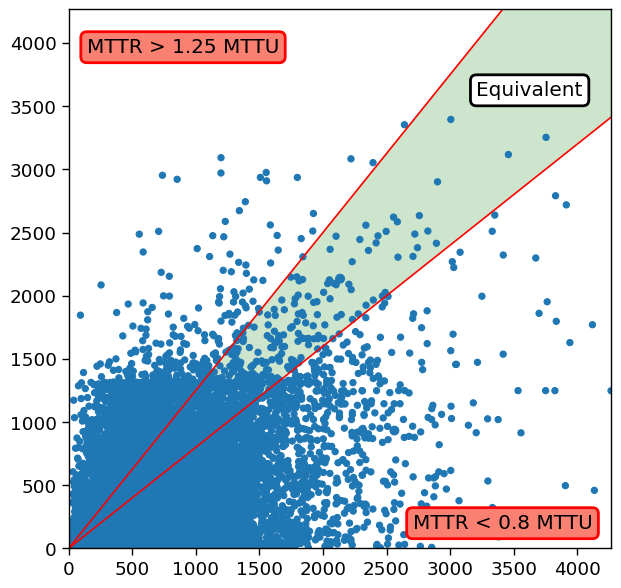

In [139]:
plot_bubble(s2[ s2.system_name == 'NPM']['avg_out_of_date_duration'].dropna().to_numpy(),
            s2[ s2.system_name == 'NPM']['avg_post_fix_exposure_time'].dropna().to_numpy(),"MTTU", "MTTR")

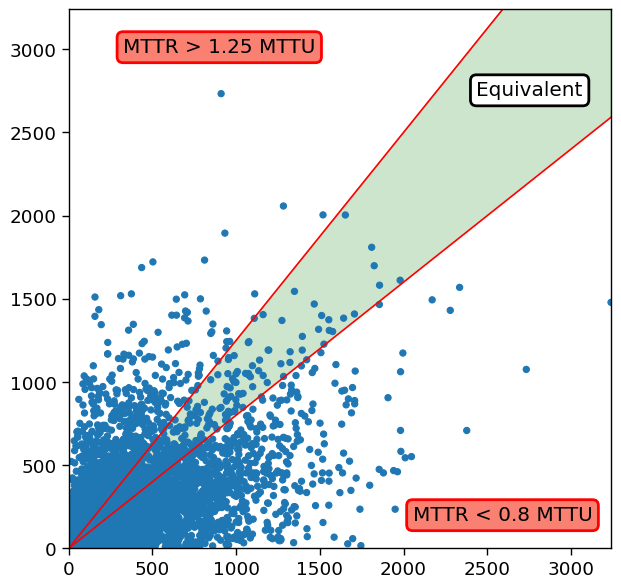

In [141]:
plot_bubble(s2[ s2.system_name == 'PYPI']['avg_out_of_date_duration'].dropna().to_numpy(),
            s2[ s2.system_name == 'PYPI']['avg_post_fix_exposure_time'].dropna().to_numpy(),"MTTU", "MTTR")

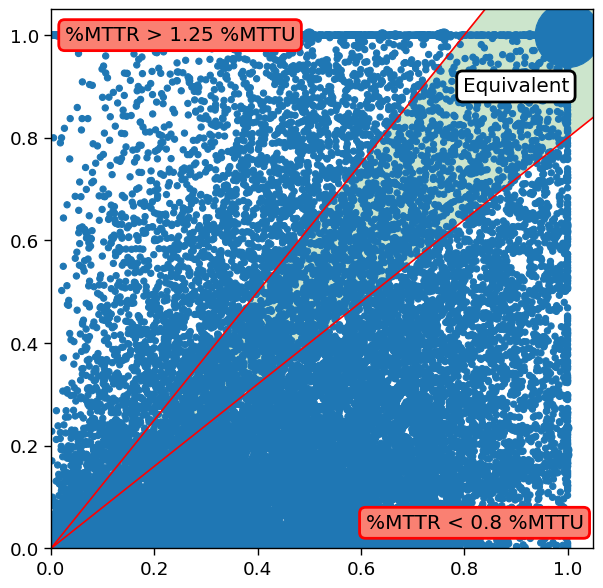

In [120]:
fig, ax = plt.subplots(figsize=(7,7))

u, c = np.unique(np.c_[avg_ratio_mttu,avg_ratio_mttr], return_counts=True, axis=0)


ax.text(0.25, 1, "%MTTR > 1.25 %MTTU",
            ha="center", va="center",
            bbox=dict(boxstyle="round",
                    fc="salmon", ec="red", lw=2))
ax.text(0.82, 0.05, "%MTTR < 0.8 %MTTU",
            ha="center", va="center",
            bbox=dict(boxstyle="round",
                    fc="salmon", ec="red", lw=2))
ax.text(0.9, 0.9, "Equivalent",
            ha="center", va="center",
            bbox=dict(boxstyle="round",
                    fc="white", ec="black", lw=2))
plt.fill_between(np.arange(0,2,0.2), 0, np.arange(0,2,0.2)/0.8, alpha=0.2, color="green")
plt.fill_between(np.arange(0,2,0.2), 0, np.arange(0,2,0.2)*0.8, alpha=1, color="white")
ax.plot(np.arange(0,2,0.2), np.arange(0,2,0.2)/0.8, color="red")
ax.plot(np.arange(0,2,0.2), 0.8*np.arange(0,2,0.2), color="red")
ax.set_xlim([0,1.05])
ax.set_ylim([0,1.05])
ax.scatter(u[:,0],u[:,1],s=c*20)
plt.show()

In [61]:
df_stat = pd.DataFrame(columns=['max tood', 'sample size', 'ks', 'epps', 'anderson', 'mannwhitney', 'cramervonmises', 'tost_ind', 'tost_rel'])

MAX_LOOP_CNT = 1000
for MAX_TOOD in [50, 100, 200, 500, 650, 800]:
    for sample_size in [10, 50, 100, 200, 500, 1000]:
        print ("MAX_TOOD:" + str(MAX_TOOD) + " sample_size:" + str(sample_size))
        
        # print(df_tood_.shape)
        # print(df_pfet_.shape)

        ks_pval = 0.0
        epps_pval = 0.0
        anderson_pval = 0.0
        mannwhitney_pval = 0.0
        cramervonmises_pval = 0.0
        tost_ind_pval = 0.0
        tost_rel_pval = 0.0

        for loop_cnt in range(0, MAX_LOOP_CNT):

            print ("loop_cnt:" + str(loop_cnt) + " MAX_TOOD:" + str(MAX_TOOD) + " sample_size:" + str(sample_size))

            df_tood_ = pd.DataFrame(s2[s2.avg_out_of_date_duration <= MAX_TOOD]['avg_out_of_date_duration'].sort_values()).sample(n=sample_size, random_state=loop_cnt)
            df_pfet_ = pd.DataFrame(s2[s2.avg_out_of_date_duration <= MAX_TOOD]['avg_post_fix_exposure_time'].sort_values()).sample(n=sample_size, random_state=loop_cnt)
            
            ks = stats.ks_2samp(np.ndarray.flatten(df_tood_.to_numpy()),
                                np.ndarray.flatten(df_pfet_.to_numpy()))
            # Do we need other things? ks.statistic, statistic_loc, sign?
            print (ks)
            ks_pval += ks.pvalue

            epps_singleton = stats.epps_singleton_2samp(np.ndarray.flatten(df_tood_.to_numpy()),
                                            np.ndarray.flatten(df_pfet_.to_numpy()))
            # print (epps_singleton)
            epps_pval += epps_singleton.pvalue

            anderson = stats.anderson_ksamp([np.ndarray.flatten(df_tood_.to_numpy()), np.ndarray.flatten(df_pfet_.to_numpy())])
            # print (anderson)
            anderson_pval += anderson.pvalue

            mannwhitney = stats.mannwhitneyu(np.ndarray.flatten(df_tood_.to_numpy()), np.ndarray.flatten(df_pfet_.to_numpy()))
            # print (mannwhitney)
            mannwhitney_pval += mannwhitney.pvalue

            cramervonmises = stats.cramervonmises_2samp(np.ndarray.flatten(df_tood_.to_numpy()), np.ndarray.flatten(df_pfet_.to_numpy()))
            # print (cramervonmises)
            cramervonmises_pval += cramervonmises.pvalue

            tost_ind = stats.ttest_ind(np.ndarray.flatten(df_tood_.to_numpy()), np.ndarray.flatten(df_pfet_.to_numpy()))
            # print (tost_ind)
            tost_ind_pval += tost_ind.pvalue

            tost_rel = stats.ttest_rel(np.ndarray.flatten(df_tood_.to_numpy()), np.ndarray.flatten(df_pfet_.to_numpy()))
            # print (tost_rel)
            tost_rel_pval += tost_rel.pvalue
        
        ks_pval /= MAX_LOOP_CNT
        epps_pval /= MAX_LOOP_CNT
        anderson_pval /= MAX_LOOP_CNT
        mannwhitney_pval /= MAX_LOOP_CNT
        cramervonmises_pval /= MAX_LOOP_CNT
        tost_ind_pval /= MAX_LOOP_CNT

        df_temp = pd.DataFrame({'max tood': MAX_TOOD, 'sample size': sample_size, 'ks': ks_pval, 'epps': epps_pval, 'anderson': anderson_pval, 'mannwhitney': mannwhitney_pval, 'cramervonmises': cramervonmises_pval, 'tost_ind': tost_ind_pval, 'tost_rel': tost_rel_pval}, index=[0])
        df_stat = pd.concat([df_stat, df_temp], axis=0, ignore_index=True)

df_stat.sort_values(by=['max tood', 'sample size'], inplace=True)
df_stat.reset_index(inplace=True, drop=True)
df_stat

MAX_TOOD:50 sample_size:10
loop_cnt:0 MAX_TOOD:50 sample_size:10
KstestResult(statistic=0.5, pvalue=0.16782134274394334, statistic_location=45.42857142857143, statistic_sign=1)
loop_cnt:1 MAX_TOOD:50 sample_size:10
KstestResult(statistic=0.3, pvalue=0.7869297884777761, statistic_location=25.333333333333332, statistic_sign=1)
loop_cnt:2 MAX_TOOD:50 sample_size:10
KstestResult(statistic=0.6, pvalue=0.05244755244755244, statistic_location=47.41935483870968, statistic_sign=1)
loop_cnt:3 MAX_TOOD:50 sample_size:10
KstestResult(statistic=0.7, pvalue=0.012340600575894691, statistic_location=47.588235294117645, statistic_sign=1)
loop_cnt:4 MAX_TOOD:50 sample_size:10
KstestResult(statistic=0.4, pvalue=0.41752365281777043, statistic_location=45.8695652173913, statistic_sign=1)
loop_cnt:5 MAX_TOOD:50 sample_size:10
KstestResult(statistic=0.5, pvalue=0.16782134274394334, statistic_location=35.0, statistic_sign=1)
loop_cnt:6 MAX_TOOD:50 sample_size:10
KstestResult(statistic=0.4, pvalue=0.4175236528

/tmp/ipykernel_9863/3836305286.py:37: UserWarning: p-value capped: true value larger than 0.25. Consider specifying `method` (e.g. `method=stats.PermutationMethod()`.)
  anderson = stats.anderson_ksamp([np.ndarray.flatten(df_tood_.to_numpy()), np.ndarray.flatten(df_pfet_.to_numpy())])


loop_cnt:12 MAX_TOOD:50 sample_size:10
KstestResult(statistic=0.7, pvalue=0.012340600575894691, statistic_location=46.375, statistic_sign=1)
loop_cnt:13 MAX_TOOD:50 sample_size:10
KstestResult(statistic=0.5, pvalue=0.16782134274394334, statistic_location=35.5, statistic_sign=1)
loop_cnt:14 MAX_TOOD:50 sample_size:10
KstestResult(statistic=0.6, pvalue=0.05244755244755244, statistic_location=45.6, statistic_sign=1)
loop_cnt:15 MAX_TOOD:50 sample_size:10
KstestResult(statistic=0.4, pvalue=0.41752365281777043, statistic_location=43.42857142857143, statistic_sign=1)
loop_cnt:16 MAX_TOOD:50 sample_size:10
KstestResult(statistic=0.6, pvalue=0.05244755244755244, statistic_location=41.666666666666664, statistic_sign=1)
loop_cnt:17 MAX_TOOD:50 sample_size:10
KstestResult(statistic=0.7, pvalue=0.012340600575894691, statistic_location=47.5, statistic_sign=1)
loop_cnt:18 MAX_TOOD:50 sample_size:10
KstestResult(statistic=0.3, pvalue=0.7869297884777761, statistic_location=42.58974358974359, statistic

/tmp/ipykernel_9863/3836305286.py:37: UserWarning: p-value floored: true value smaller than 0.001. Consider specifying `method` (e.g. `method=stats.PermutationMethod()`.)
  anderson = stats.anderson_ksamp([np.ndarray.flatten(df_tood_.to_numpy()), np.ndarray.flatten(df_pfet_.to_numpy())])


loop_cnt:53 MAX_TOOD:50 sample_size:10
KstestResult(statistic=0.4, pvalue=0.41752365281777043, statistic_location=46.375, statistic_sign=1)
loop_cnt:54 MAX_TOOD:50 sample_size:10
KstestResult(statistic=0.6, pvalue=0.05244755244755244, statistic_location=39.25, statistic_sign=1)
loop_cnt:55 MAX_TOOD:50 sample_size:10
KstestResult(statistic=0.2, pvalue=0.9944575548290717, statistic_location=24.2, statistic_sign=1)
loop_cnt:56 MAX_TOOD:50 sample_size:10
KstestResult(statistic=0.5, pvalue=0.16782134274394334, statistic_location=40.79411764705882, statistic_sign=1)
loop_cnt:57 MAX_TOOD:50 sample_size:10
KstestResult(statistic=0.4, pvalue=0.41752365281777043, statistic_location=48.15384615384615, statistic_sign=1)
loop_cnt:58 MAX_TOOD:50 sample_size:10
KstestResult(statistic=0.4, pvalue=0.41752365281777043, statistic_location=29.0, statistic_sign=1)
loop_cnt:59 MAX_TOOD:50 sample_size:10
KstestResult(statistic=0.4, pvalue=0.41752365281777043, statistic_location=44.0, statistic_sign=1)
loop_c

/tmp/ipykernel_9863/3836305286.py:65: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_stat = pd.concat([df_stat, df_temp], axis=0, ignore_index=True)


MAX_TOOD:50 sample_size:50
loop_cnt:0 MAX_TOOD:50 sample_size:50
KstestResult(statistic=0.54, pvalue=4.929118631187453e-07, statistic_location=49.785714285714285, statistic_sign=1)
loop_cnt:1 MAX_TOOD:50 sample_size:50
KstestResult(statistic=0.34, pvalue=0.005841778142694731, statistic_location=49.21052631578947, statistic_sign=1)
loop_cnt:2 MAX_TOOD:50 sample_size:50
KstestResult(statistic=0.56, pvalue=1.4534580579142488e-07, statistic_location=48.666666666666664, statistic_sign=1)
loop_cnt:3 MAX_TOOD:50 sample_size:50
KstestResult(statistic=0.44, pvalue=9.909301386655972e-05, statistic_location=48.4, statistic_sign=1)
loop_cnt:4 MAX_TOOD:50 sample_size:50
KstestResult(statistic=0.4, pvalue=0.0005822568814776493, statistic_location=47.65, statistic_sign=1)
loop_cnt:5 MAX_TOOD:50 sample_size:50
KstestResult(statistic=0.5, pvalue=4.8075337049514946e-06, statistic_location=49.25, statistic_sign=1)
loop_cnt:6 MAX_TOOD:50 sample_size:50
KstestResult(statistic=0.44, pvalue=9.909301386655972

KeyboardInterrupt: 

In [28]:
print(df_stat.to_latex(columns=['max tood', 'sample size', 'ks', 'epps', 'anderson', 'mannwhitney', 'cramervonmises', 'tost_ind'], float_format="%.3f", bold_rows=False, index=False, label="tab:stat-tests", caption="p-values of statistical tests."))

\begin{table}
\caption{p-values of statistical tests.}
\label{tab:stat-tests}
\begin{tabular}{llrrrrrr}
\toprule
max tood & sample size & ks & epps & anderson & mannwhitney & cramervonmises & tost_ind \\
\midrule
50 & 10 & 0.273 & 0.314 & 0.140 & 0.305 & 0.241 & 0.121 \\
50 & 50 & 0.001 & 0.000 & 0.002 & 0.018 & 0.003 & 0.001 \\
50 & 100 & 0.000 & 0.000 & 0.001 & 0.001 & 0.000 & 0.000 \\
50 & 200 & 0.000 & 0.000 & 0.001 & 0.000 & 0.000 & 0.000 \\
50 & 500 & 0.000 & 0.000 & 0.001 & 0.000 & 0.000 & 0.000 \\
100 & 10 & 0.397 & 0.361 & 0.175 & 0.460 & 0.323 & 0.185 \\
100 & 50 & 0.009 & 0.000 & 0.007 & 0.113 & 0.018 & 0.003 \\
100 & 100 & 0.000 & 0.000 & 0.001 & 0.027 & 0.001 & 0.000 \\
100 & 200 & 0.000 & 0.000 & 0.001 & 0.002 & 0.000 & 0.000 \\
100 & 500 & 0.000 & 0.000 & 0.001 & 0.000 & 0.000 & 0.000 \\
200 & 10 & 0.609 & 0.477 & 0.226 & 0.690 & 0.509 & 0.414 \\
200 & 50 & 0.087 & 0.003 & 0.041 & 0.587 & 0.104 & 0.053 \\
200 & 100 & 0.007 & 0.000 & 0.003 & 0.469 & 0.019 & 0.005 \\
200 &

In [38]:
df_stat = pd.DataFrame(columns=['max tood', 'sample size', 'ks', 'epps', 'anderson', 'mannwhitney', 'cramervonmises', 'tost_ind', 'tost_rel'])

MAX_LOOP_CNT = 1000
for MAX_TOOD in [50, 100, 200, 500, 650, 800]:
    for sample_size in [10, 50, 100, 200, 500, 1000]:
        print ("MAX_TOOD:" + str(MAX_TOOD) + " sample_size:" + str(sample_size))
        
        # print(df_tood_.shape)
        # print(df_pfet_.shape)

        ks_pval = 0.0
        epps_pval = 0.0
        anderson_pval = 0.0
        mannwhitney_pval = 0.0
        cramervonmises_pval = 0.0
        tost_ind_pval = 0.0
        tost_rel_pval = 0.0

        for loop_cnt in range(0, MAX_LOOP_CNT):

            print ("loop_cnt:" + str(loop_cnt) + " MAX_TOOD:" + str(MAX_TOOD) + " sample_size:" + str(sample_size))

            df_tood_ = pd.DataFrame(s1[s1.avg_out_of_date_duration <= MAX_TOOD]['avg_out_of_date_duration'].dropna().sort_values()).sample(n=sample_size, random_state=loop_cnt)
            df_pfet_ = pd.DataFrame(s1[s1.avg_out_of_date_duration <= MAX_TOOD]['avg_post_fix_exposure_time'].dropna().sort_values()).sample(n=sample_size, random_state=loop_cnt)
            
            ks = stats.ks_2samp(np.ndarray.flatten(df_tood_.to_numpy()),
                                np.ndarray.flatten(df_pfet_.to_numpy()))
            # Do we need other things? ks.statistic, statistic_loc, sign?
            print (ks)
            ks_pval += ks.pvalue

            epps_singleton = stats.epps_singleton_2samp(np.ndarray.flatten(df_tood_.to_numpy()),
                                            np.ndarray.flatten(df_pfet_.to_numpy()))
            # print (epps_singleton)
            epps_pval += epps_singleton.pvalue

            anderson = stats.anderson_ksamp([np.ndarray.flatten(df_tood_.to_numpy()), np.ndarray.flatten(df_pfet_.to_numpy())])
            # print (anderson)
            anderson_pval += anderson.pvalue

            mannwhitney = stats.mannwhitneyu(np.ndarray.flatten(df_tood_.to_numpy()), np.ndarray.flatten(df_pfet_.to_numpy()))
            # print (mannwhitney)
            mannwhitney_pval += mannwhitney.pvalue

            cramervonmises = stats.cramervonmises_2samp(np.ndarray.flatten(df_tood_.to_numpy()), np.ndarray.flatten(df_pfet_.to_numpy()))
            # print (cramervonmises)
            cramervonmises_pval += cramervonmises.pvalue

            tost_ind = stats.ttest_ind(np.ndarray.flatten(df_tood_.to_numpy()), np.ndarray.flatten(df_pfet_.to_numpy()))
            # print (tost_ind)
            tost_ind_pval += tost_ind.pvalue

            tost_rel = stats.ttest_rel(np.ndarray.flatten(df_tood_.to_numpy()), np.ndarray.flatten(df_pfet_.to_numpy()))
            # print (tost_rel)
            tost_rel_pval += tost_rel.pvalue
        
        ks_pval /= MAX_LOOP_CNT
        epps_pval /= MAX_LOOP_CNT
        anderson_pval /= MAX_LOOP_CNT
        mannwhitney_pval /= MAX_LOOP_CNT
        cramervonmises_pval /= MAX_LOOP_CNT
        tost_ind_pval /= MAX_LOOP_CNT

        df_temp = pd.DataFrame({'max tood': MAX_TOOD, 'sample size': sample_size, 'ks': ks_pval, 'epps': epps_pval, 'anderson': anderson_pval, 'mannwhitney': mannwhitney_pval, 'cramervonmises': cramervonmises_pval, 'tost_ind': tost_ind_pval, 'tost_rel': tost_rel_pval}, index=[0])
        df_stat = pd.concat([df_stat, df_temp], axis=0, ignore_index=True)

df_stat.sort_values(by=['max tood', 'sample size'], inplace=True)
df_stat.reset_index(inplace=True, drop=True)
df_stat

MAX_TOOD:50 sample_size:10
loop_cnt:0 MAX_TOOD:50 sample_size:10
KstestResult(statistic=0.0, pvalue=1.0, statistic_location=0.0, statistic_sign=1)


/home/imranur/security-metrics/secmet_venv/lib/python3.12/site-packages/scipy/stats/_hypotests.py:120: RuntimeWarning: divide by zero encountered in divide
  ts = np.reshape(t, (-1, 1)) / sigma
/home/imranur/security-metrics/secmet_venv/lib/python3.12/site-packages/scipy/stats/_hypotests.py:123: RuntimeWarning: invalid value encountered in multiply
  gx = np.vstack((np.cos(ts*x), np.sin(ts*x))).T  # shape = (nx, 2*len(t))
/home/imranur/security-metrics/secmet_venv/lib/python3.12/site-packages/scipy/stats/_hypotests.py:124: RuntimeWarning: invalid value encountered in multiply
  gy = np.vstack((np.cos(ts*y), np.sin(ts*y))).T


LinAlgError: SVD did not converge

In [ ]:
print(df_stat.to_latex(columns=['max tood', 'sample size', 'ks', 'epps', 'anderson', 'mannwhitney', 'cramervonmises', 'tost_ind'], float_format="%.3f", bold_rows=False, index=False, label="tab:stat-tests", caption="p-values of statistical tests."))

In [31]:
# correlation analysis
# change sample size, change max tood, change method
df_corr = pd.DataFrame(columns=['type', 'sample size', 'spearman', 'pearson', 'kendall'])
for sample_size in [10, 50, 100, 1000, 10000, 17384]:
    print (sample_size)
    df_spearman = s2[['avg_out_of_date_duration',
                'avg_ratio_mttu',
                'avg_post_fix_exposure_time',
                'avg_ratio_mttr']].sample(n=sample_size, random_state=1).corr(method='spearman')
    # print (df_spearman['avg_out_of_date_duration']['avg_post_fix_exposure_time'])
    # print (df_spearman['avg_ratio_tood']['avg_ratio_pfet'])
    df_pearson = s2[['avg_out_of_date_duration',
                'avg_ratio_mttu',
                'avg_post_fix_exposure_time',
                'avg_ratio_mttr']].sample(n=sample_size, random_state=1).corr(method='pearson')
    # print (df_pearson['avg_out_of_date_duration']['avg_post_fix_exposure_time'])
    # print (df_pearson['avg_ratio_tood']['avg_ratio_pfet'])
    df_kendall = s2[['avg_out_of_date_duration',
                'avg_ratio_mttu',
                'avg_post_fix_exposure_time',
                'avg_ratio_mttr']].sample(n=sample_size, random_state=1).corr(method='kendall')
    # print (df_kendall['avg_out_of_date_duration']['avg_post_fix_exposure_time'])
    # print (df_kendall['avg_ratio_tood']['avg_ratio_pfet'])
    df_temp = pd.DataFrame({'type': 'tood vs pfet', 'sample size': sample_size, 'spearman': df_spearman['avg_out_of_date_duration']['avg_post_fix_exposure_time'], 'pearson': df_pearson['avg_out_of_date_duration']['avg_post_fix_exposure_time'], 'kendall': df_kendall['avg_out_of_date_duration']['avg_post_fix_exposure_time']}, index=[0])
    df_temp2 = pd.DataFrame({'type': 'rtood vs rpfet', 'sample size': sample_size, 'spearman': df_spearman['avg_ratio_mttu']['avg_ratio_mttr'], 'pearson': df_pearson['avg_ratio_mttu']['avg_ratio_mttr'], 'kendall': df_kendall['avg_ratio_mttu']['avg_ratio_mttr']}, index=[0])
    df_corr = pd.concat([df_corr, df_temp, df_temp2], axis=0, ignore_index=True)
df_corr.sort_values(by=['type', 'sample size'], inplace=True)
df_corr.reset_index(inplace=True, drop=True)
df_corr

10
50
100
1000
10000
17384


/tmp/ipykernel_188069/207686682.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_corr = pd.concat([df_corr, df_temp, df_temp2], axis=0, ignore_index=True)


,type,sample size,spearman,pearson,kendall
0,rtood vs rpfet,10,0.551205,0.611288,0.433200
1,rtood vs rpfet,50,0.281361,0.291211,0.207204
2,rtood vs rpfet,100,0.201470,0.209543,0.134137
3,rtood vs rpfet,1000,0.290873,0.281034,0.202364
4,rtood vs rpfet,10000,0.342937,0.334438,0.240945
5,rtood vs rpfet,17384,0.331872,0.323156,0.232991
6,tood vs pfet,10,0.587879,0.725022,0.422222
7,tood vs pfet,50,0.377028,0.352335,0.259553
8,tood vs pfet,100,0.296388,0.274896,0.193698
9,tood vs pfet,1000,0.405861,0.377294,0.278380


In [32]:
print(df_corr.to_latex(columns=['type', 'sample size', 'spearman', 'pearson', 'kendall'], float_format="%.3f", bold_rows=False, index=False, label="tab:correlation", caption="Correlation coefficients."))

\begin{table}
\caption{Correlation coefficients.}
\label{tab:correlation}
\begin{tabular}{llrrr}
\toprule
type & sample size & spearman & pearson & kendall \\
\midrule
rtood vs rpfet & 10 & 0.551 & 0.611 & 0.433 \\
rtood vs rpfet & 50 & 0.281 & 0.291 & 0.207 \\
rtood vs rpfet & 100 & 0.201 & 0.210 & 0.134 \\
rtood vs rpfet & 1000 & 0.291 & 0.281 & 0.202 \\
rtood vs rpfet & 10000 & 0.343 & 0.334 & 0.241 \\
rtood vs rpfet & 17384 & 0.332 & 0.323 & 0.233 \\
tood vs pfet & 10 & 0.588 & 0.725 & 0.422 \\
tood vs pfet & 50 & 0.377 & 0.352 & 0.260 \\
tood vs pfet & 100 & 0.296 & 0.275 & 0.194 \\
tood vs pfet & 1000 & 0.406 & 0.377 & 0.278 \\
tood vs pfet & 10000 & 0.435 & 0.419 & 0.302 \\
tood vs pfet & 17384 & 0.420 & 0.404 & 0.291 \\
\bottomrule
\end{tabular}
\end{table}



In [14]:
df_spearman = s2[['mttu_inverse_weighted',
                'mttu_expo_weighted',
                'mttr_inverse_weighted',
                'mttr_expo_weighted']].corr(method='spearman')
print (df_spearman['mttu_inverse_weighted']['mttr_inverse_weighted'])
print (df_spearman['mttu_expo_weighted']['mttr_expo_weighted'])
df_pearson = s2[['mttu_inverse_weighted',
            'mttu_expo_weighted',
            'mttr_inverse_weighted',
            'mttr_expo_weighted']].corr(method='pearson')
print (df_pearson['mttu_inverse_weighted']['mttr_inverse_weighted'])
print (df_pearson['mttu_expo_weighted']['mttr_expo_weighted'])
df_kendall = s2[['mttu_inverse_weighted',
            'mttu_expo_weighted',
            'mttr_inverse_weighted',
            'mttr_expo_weighted']].corr(method='kendall')
print (df_kendall['mttu_inverse_weighted']['mttr_inverse_weighted'])
print (df_kendall['mttu_expo_weighted']['mttr_expo_weighted'])

0.5702316337642876
0.6708073012704829
0.5958927771375797
0.5891461395850759
0.4248834423825351
0.4999242514893806


In [26]:
df_spearman = s1[['avg_out_of_date_duration',
                'avg_ratio_mttu',
                'avg_post_fix_exposure_time',
                'avg_ratio_mttr']].corr(method='spearman')
print (df_spearman['avg_out_of_date_duration']['avg_post_fix_exposure_time'])
print (df_spearman['avg_ratio_mttu']['avg_ratio_mttr'])
df_pearson = s1[['avg_out_of_date_duration',
            'avg_ratio_mttu',
            'avg_post_fix_exposure_time',
            'avg_ratio_mttr']].corr(method='pearson')
print (df_pearson['avg_out_of_date_duration']['avg_post_fix_exposure_time'])
print (df_pearson['avg_ratio_mttu']['avg_ratio_mttr'])
df_kendall = s1[['avg_out_of_date_duration',
            'avg_ratio_mttu',
            'avg_post_fix_exposure_time',
            'avg_ratio_mttr']].corr(method='kendall')
print (df_kendall['avg_out_of_date_duration']['avg_post_fix_exposure_time'])
print (df_kendall['avg_ratio_mttu']['avg_ratio_mttr'])

0.9784811100710451
0.9722638801100684
0.7189070959483558
0.6925344632403597
0.8824237610012882
0.863157531510818
